# Analysis of US Demographics From 2010 to 2020

In [94]:
#IMPORT THESE IMPORTANT MODULES
import matplotlib.pylab as plt
import plotly.express as px
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import utilities
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Reading in the Datasets and Turning Them into Dataframes

#### Income

In [2]:
infilename = "Data Sets/2000 Income Cleaned.csv"
df2000Income = utilities.parse_csv_file_to_dataframe(infilename, filetype='income', fileyear='2000')

print('2000 Income Dataframe')
#df2000Income

2000 Income Dataframe


In [3]:
infilename = "Data Sets/2010 Income Cleaned.csv"
df2010Income = utilities.parse_csv_file_to_dataframe(infilename, filetype='income', fileyear='2010')

print('2010 Income Dataframe')
#df2010Income

2010 Income Dataframe


In [4]:
infilename = "Data Sets/2020 Income Cleaned.csv"
df2020Income = utilities.parse_csv_file_to_dataframe(infilename, filetype='income', fileyear='2020')

print('2020 Income Dataframe')
#df2020Income

2020 Income Dataframe


#### Population and Demographics

In [5]:
infilename = "Data Sets/2000 Population Cleaned.csv"
df2000Demographics = utilities.parse_csv_file_to_dataframe(infilename, filetype='demographics', fileyear='2000')

print('2000 Demographics Dataframe')
#df2000Demographics

2000 Demographics Dataframe


In [6]:
infilename = "Data Sets/2010 Population and Demographics Cleaned.csv"
df2010Demographics = utilities.parse_csv_file_to_dataframe(infilename, filetype='demographics', fileyear='2010')

print('2010 Demographics Dataframe')
#df2010Demographics

2010 Demographics Dataframe


In [7]:
infilename = "Data Sets/2020 Population and Demographics Cleaned.csv"
df2020Demographics = utilities.parse_csv_file_to_dataframe(infilename, filetype='demographics', fileyear='2020')

print('2020 Demographics Dataframe')
#df2020Demographics

2020 Demographics Dataframe


#### Removing Non-States from the Dataset

In [8]:
#Drop Non-States into a Mask
mask = (df2000Income['State'] == 'DC') | (df2000Income['State'] == 'PR')
#Reassign the dataframe to give it the same name
df2000Income = df2000Income[~mask]
#df2000Income

#Drop Non-States into a Mask
mask = (df2010Income['State'] == 'DC') | (df2010Income['State'] == 'PR')
#Reassign the dataframe to give it the same name
df2010Income = df2010Income[~mask]
#df2010Income

#Drop Non-States into a Mask
mask = (df2020Income['State'] == 'DC') | (df2020Income['State'] == 'PR')
#Reassign the dataframe to give it the same name
df2020Income = df2020Income[~mask]
#df2020Income

#Drop Non-States into a Mask
mask = (df2000Demographics['State'] == 'DC') | (df2000Demographics['State'] == 'PR')
#Reassign the dataframe to give it the same name
df2000Demographics = df2000Demographics[~mask]
#df2000Demographics

#Drop Non-States into a Mask
mask = (df2010Demographics['State'] == 'DC') | (df2010Demographics['State'] == 'PR')
#Reassign the dataframe to give it the same name
df2010Demographics = df2010Demographics[~mask]
#df2010Demographics

#Drop Non-States into a Mask
mask = (df2020Demographics['State'] == 'DC') | (df2020Demographics['State'] == 'PR')
#Reassign the dataframe to give it the same name
df2020Demographics = df2020Demographics[~mask]
#df2020Demographics

## Graphs of Features by Year

### Making a New Dataframe With the Calculated Differences and Fractions

In [9]:
#New Dataframe with State Names Copied Over
dfnew = df2010Demographics[['State']].copy()

In [10]:
#Adding all of the calcualted values to the new Dataframe dfnew
#Total Population
a = df2010Demographics['Population']
b = df2020Demographics['Population']
c = b - a
dfnew['Population Change'] = c
dfnew['Population Change Fraction'] = c/a

dfnew['Population 2010'] = a
dfnew['Population 2020'] = b
#Number of Males
d = df2010Demographics['Male']
e = df2020Demographics['Male']
f = e - d
dfnew['Male Change'] = f
dfnew['Male Change Fraction'] = f/d

dfnew['Male 2010'] = d
dfnew['Male 2020'] = e

dfnew['Male Fraction 2010'] = d/a
dfnew['Male Fraction 2020'] = e/b

#Number of Females
g = df2010Demographics['Female']
h = df2020Demographics['Female']
i = h - g
dfnew['Female Change'] = i
dfnew['Female Change Fraction'] = i/g

dfnew['Female 2010'] = g
dfnew['Female 2020'] = h

dfnew['Female Fraction 2010'] = g/a
dfnew['Female Fraction 2020'] = h/b



dfnew['Male/Female 2010'] = d/g
dfnew['Male/Female 2020'] = e/h

dfnew['Male/Female Change'] = (e/h) - (d/g)

#Median Income per Household
j = df2010Income['Median']
k = df2020Income['Median']
l = k - j
dfnew['Median Income Change'] = l
dfnew['Median Income Change Fraction'] = l/j

dfnew['Median Income 2010'] = j
dfnew['Median Income 2020'] = k

#Mean Income per Household
m = df2010Income['Mean']
n = df2020Income['Mean']
o = n - m
dfnew['Mean Income Change'] = o
dfnew['Mean Income Change Fraction'] = o/m

dfnew['Mean Income 2010'] = m
dfnew['Mean Income 2020'] = n

#Number of White as Only Race
p = df2010Demographics['White']
q = df2020Demographics['White']
r = q - p
dfnew['White Change'] = r
dfnew['White Change Fraction'] = r/p

dfnew['White 2010'] = p
dfnew['White 2020'] = q

dfnew['White Fraction 2010'] = p/a
dfnew['White Fraction 2020'] = q/b



#Number of Black or African American as Only Race
t = df2010Demographics['Black or African American']
u = df2020Demographics['Black or African American']
v = u - t
dfnew['Black or African American Change'] = v
dfnew['Black or African American Change Fraction'] = v/t

dfnew['Black 2010'] = t
dfnew['Black 2020'] = u

dfnew['Black Fraction 2010'] = t/a
dfnew['Black Fraction 2020'] = u/b



dfnew['White/Black 2010'] = p/t
dfnew['White/Black 2020'] = q/u

dfnew['White/Black Change'] = (q/u) - (p/t)

#Printing out a snipit of the new dataframe that was created
dfnew[0:10]

,State,Population Change,Population Change Fraction,Population 2010,Population 2020,Male Change,Male Change Fraction,Male 2010,Male 2020,Male Fraction 2010,...,White Fraction 2020,Black or African American Change,Black or African American Change Fraction,Black 2010,Black 2020,Black Fraction 2010,Black Fraction 2020,White/Black 2010,White/Black 2020,White/Black Change
0,AL,107888.0,0.022546,4785298.0,4893186.0,43491.0,0.018728,2322243.0,2365734.0,0.485287,...,0.674986,10652.0,0.008253,1290667.0,1301319.0,0.269715,0.265945,2.621000,2.538066,-0.082933
1,AK,23005.0,0.032221,713985.0,736990.0,12217.0,0.032803,372436.0,384653.0,0.521630,...,0.633606,-9227.0,-0.278585,33121.0,23894.0,0.046389,0.032421,15.900546,19.543023,3.642477
2,AZ,760327.0,0.118547,6413737.0,7174064.0,374279.0,0.117303,3190700.0,3564979.0,0.497479,...,0.737727,12185.0,0.038940,312920.0,325105.0,0.048789,0.045317,16.752758,16.279350,-0.473408
3,AR,90267.0,0.030896,2921606.0,3011873.0,47674.0,0.033319,1430837.0,1478511.0,0.489743,...,0.753670,-22567.0,-0.046975,480407.0,457840.0,0.164433,0.152012,4.862548,4.957974,0.095427
4,CA,1996660.0,0.053459,37349363.0,39346023.0,992377.0,0.053438,18570505.0,19562882.0,0.497211,...,0.560507,-398460.0,-0.150395,2649422.0,2250962.0,0.070936,0.057209,9.289306,9.797465,0.508159
5,CO,635855.0,0.125935,5049071.0,5684926.0,330791.0,0.130677,2531362.0,2862153.0,0.501352,...,0.815192,-12116.0,-0.048893,247808.0,235692.0,0.049080,0.041459,17.593879,19.662547,2.068668
6,CT,-6524.0,-0.001824,3577073.0,3570549.0,2770.0,0.001593,1738918.0,1741688.0,0.486129,...,0.742181,-20810.0,-0.051641,402971.0,382161.0,0.112654,0.107031,7.127711,6.934235,-0.193477
7,DE,67910.0,0.075475,899769.0,967679.0,31112.0,0.071258,436608.0,467720.0,0.485245,...,0.674384,9175.0,0.045059,203620.0,212795.0,0.226303,0.219902,3.216084,3.066740,-0.149344
9,FL,2373598.0,0.125965,18843326.0,21216924.0,1162046.0,0.126137,9212548.0,10374594.0,0.488902,...,0.716390,185701.0,0.058116,3195360.0,3381061.0,0.169575,0.159357,4.613945,4.495508,-0.118437
10,GA,803992.0,0.082778,9712587.0,10516579.0,371182.0,0.078263,4742754.0,5113936.0,0.488310,...,0.572455,248334.0,0.080851,3071510.0,3319844.0,0.316240,0.315677,1.965368,1.813418,-0.151950


### Creating the Graphs

#### Population

In [11]:
# Sorting the dataframe from lowest to highest so it graphs nicer
dfnew = dfnew.sort_values(by=['Population Change'], ascending=True)
#dfnew

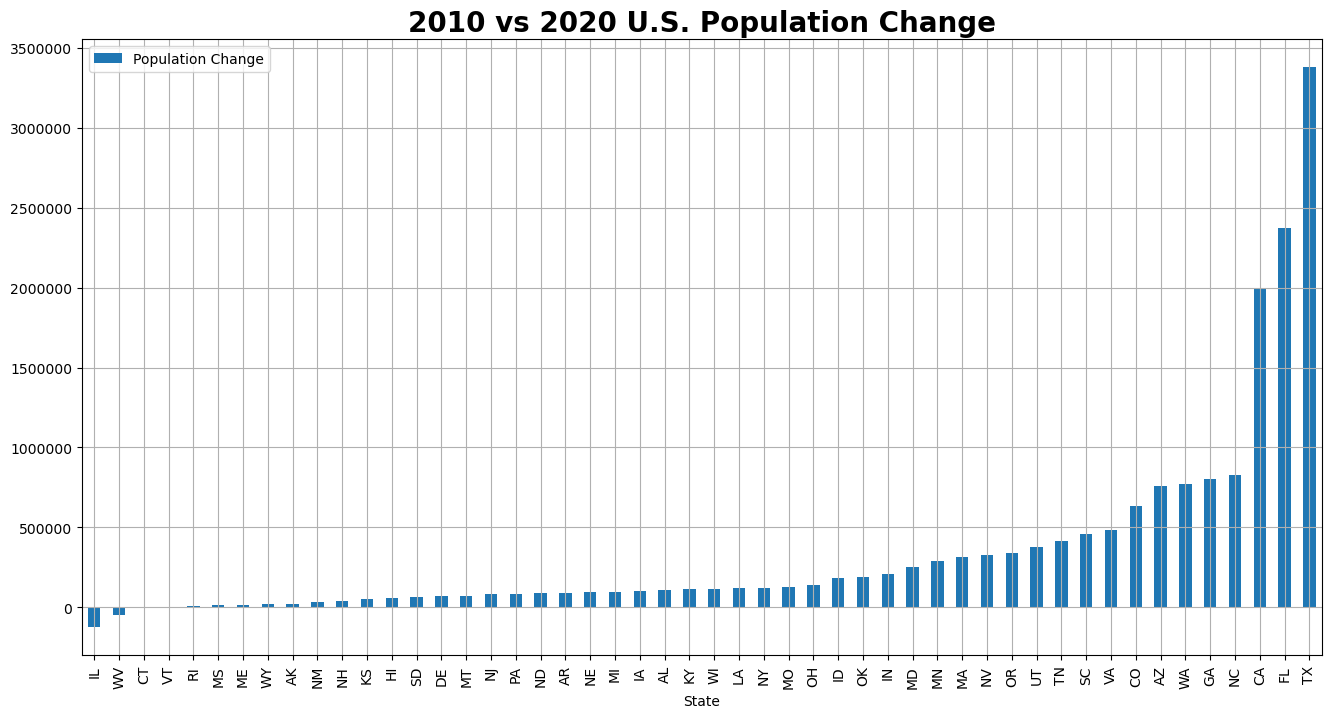

In [12]:
plt.figure(figsize=(16,8))
dfnew.plot.bar(x='State',y='Population Change',ax=plt.gca())
plt.title("2010 vs 2020 U.S. Population Change", fontsize=20, fontweight ='bold')
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.grid()

In [13]:
# Sorting the dataframe from lowest to highest so it graphs nicer
dfnew = dfnew.sort_values(by=['Population Change Fraction'], ascending=True)
#dfnew

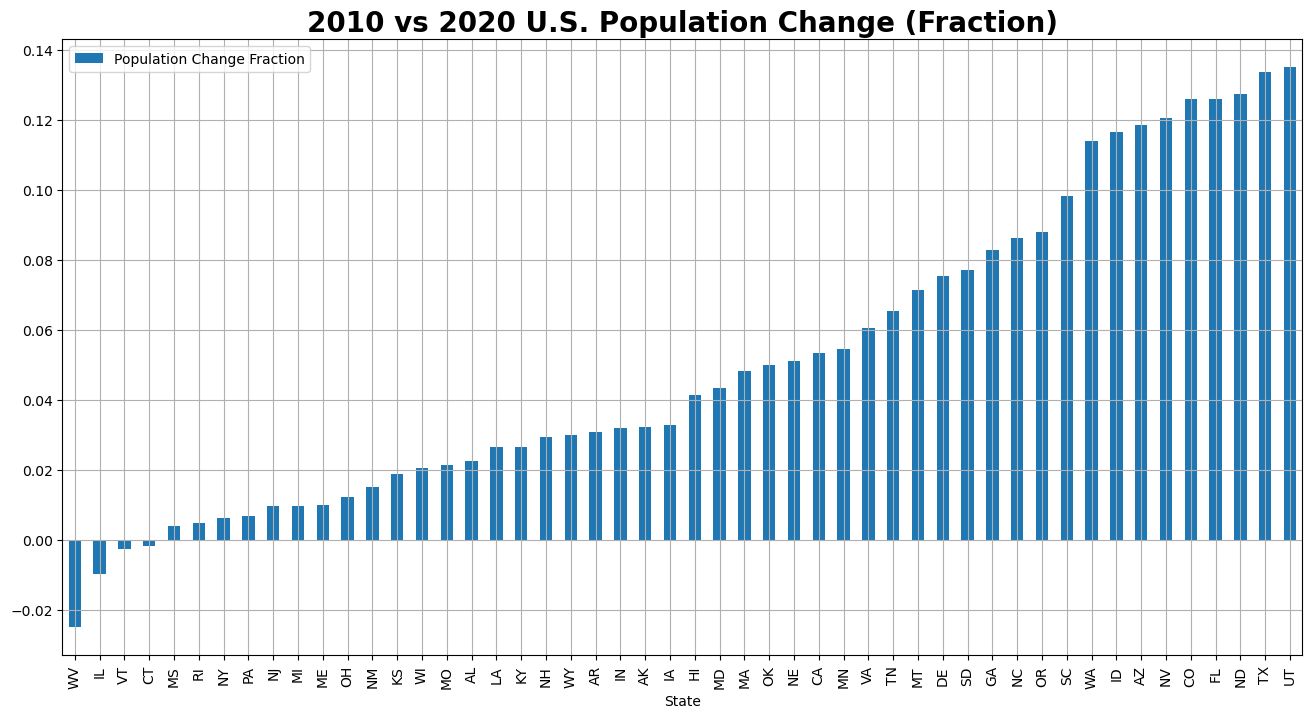

In [14]:
plt.figure(figsize=(16,8))
dfnew.plot.bar(x='State',y='Population Change Fraction',ax=plt.gca())
plt.title("2010 vs 2020 U.S. Population Change (Fraction)", fontsize=20, fontweight ='bold')
plt.grid()

#### Sex (Female, Male)

##### Male

In [15]:
# Sorting the dataframe from lowest to highest so it graphs nicer
dfnew = dfnew.sort_values(by=['Male Change'], ascending=True)
#dfnew

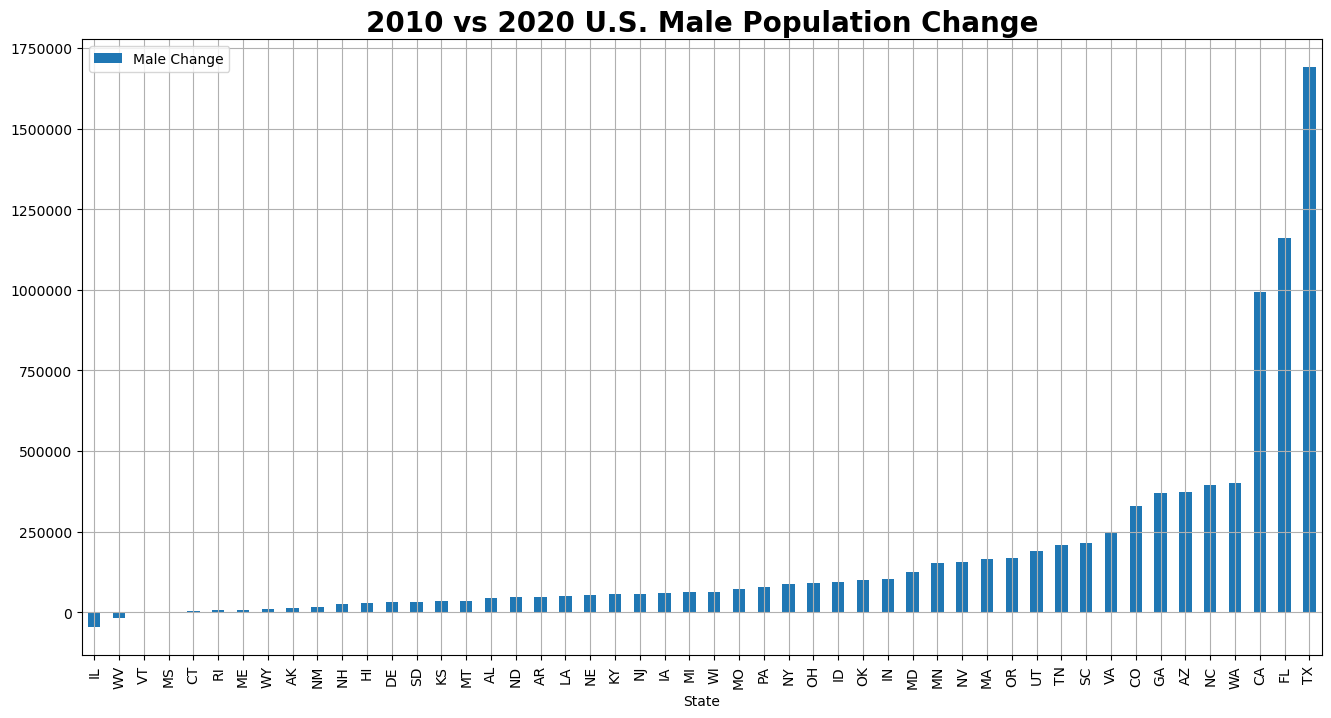

In [16]:
plt.figure(figsize=(16,8))
dfnew.plot.bar(x='State',y='Male Change',ax=plt.gca())
plt.title("2010 vs 2020 U.S. Male Population Change", fontsize=20, fontweight ='bold')
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.grid()

In [17]:
# Sorting the dataframe from lowest to highest so it graphs nicer
dfnew = dfnew.sort_values(by=['Male Change Fraction'], ascending=True)
#dfnew

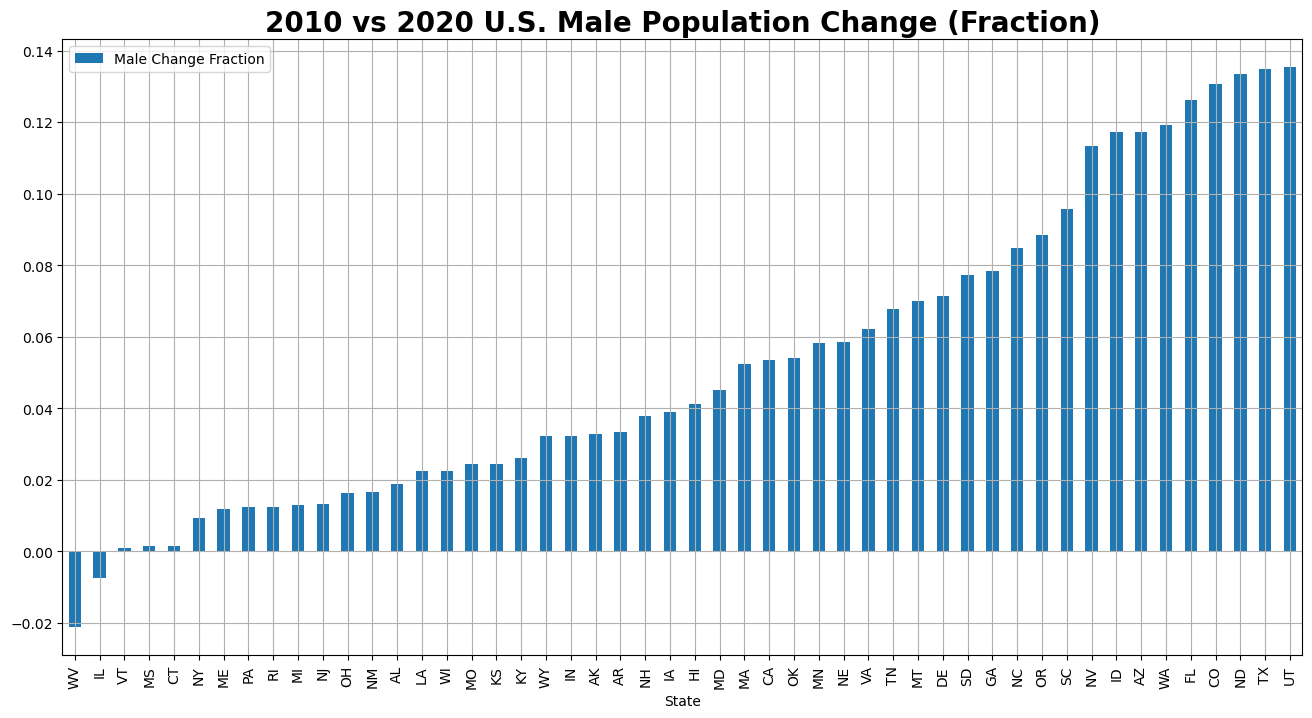

In [18]:
plt.figure(figsize=(16,8))
dfnew.plot.bar(x='State',y='Male Change Fraction',ax=plt.gca())
plt.title("2010 vs 2020 U.S. Male Population Change (Fraction)", fontsize=20, fontweight ='bold')
plt.grid()

##### Female

In [19]:
# Sorting the dataframe from lowest to highest so it graphs nicer
dfnew = dfnew.sort_values(by=['Female Change'], ascending=True)
#dfnew

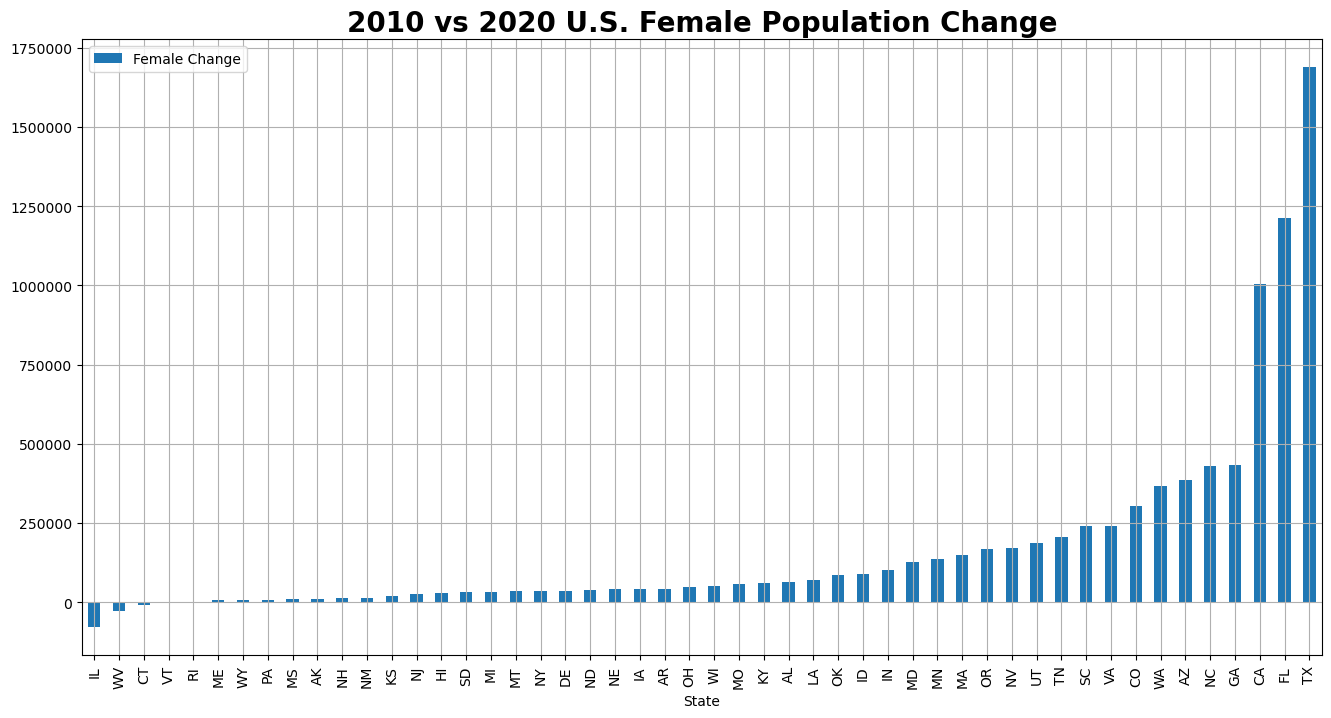

In [20]:
plt.figure(figsize=(16,8))
dfnew.plot.bar(x='State',y='Female Change',ax=plt.gca())
plt.title("2010 vs 2020 U.S. Female Population Change", fontsize=20, fontweight ='bold')
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.grid()

In [21]:
# Sorting the dataframe from lowest to highest so it graphs nicer
dfnew = dfnew.sort_values(by=['Female Change Fraction'], ascending=True)
#dfnew

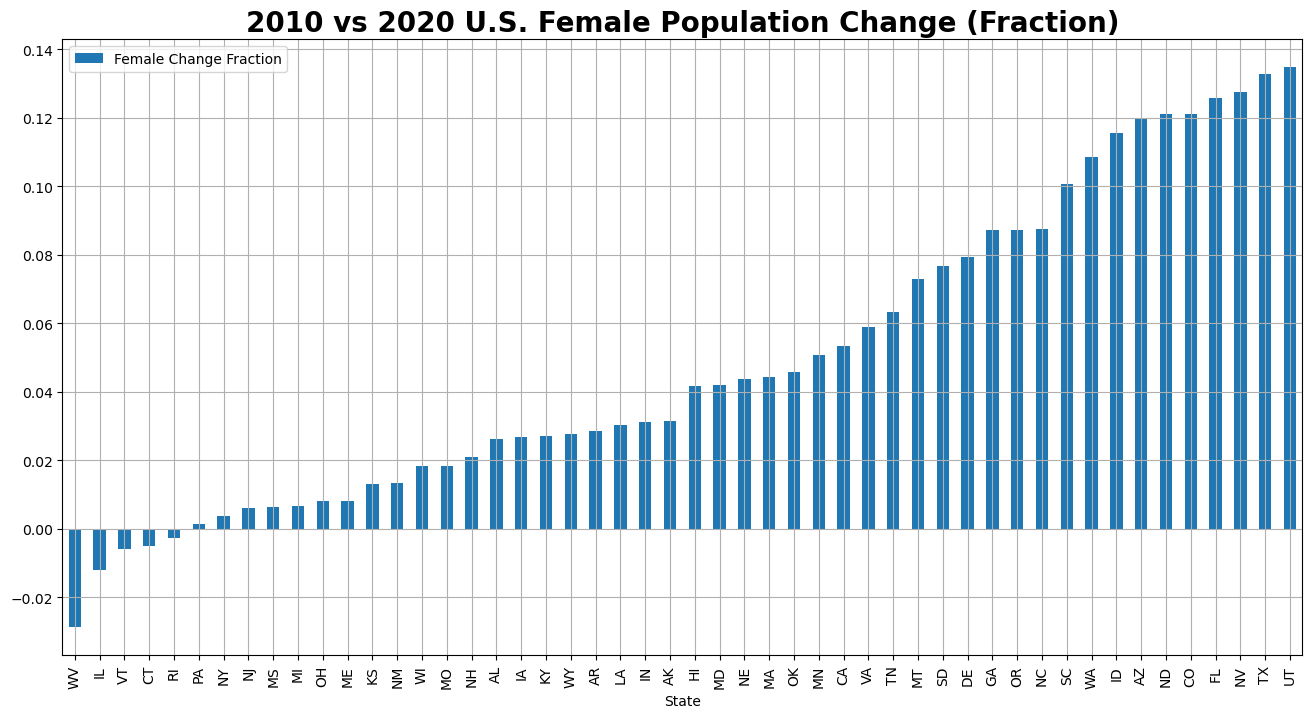

In [22]:
plt.figure(figsize=(16,8))
dfnew.plot.bar(x='State',y='Female Change Fraction',ax=plt.gca())
plt.title("2010 vs 2020 U.S. Female Population Change (Fraction)", fontsize=20, fontweight ='bold')
plt.grid()

##### Male/Female Same Graph

In [23]:
# Sorting the dataframe from lowest to highest so it graphs nicer
dfnew = dfnew.sort_values(by=['Male Change','Female Change'], ascending=True)
#dfnew

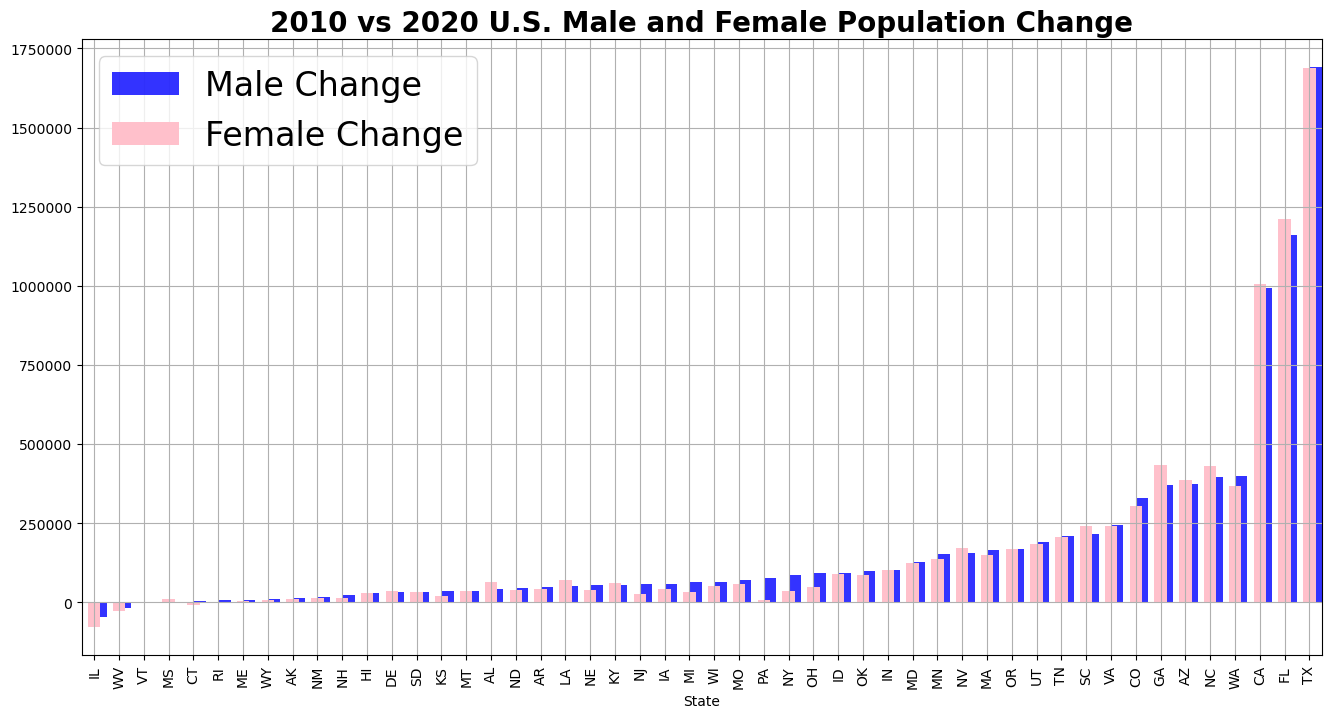

In [24]:
plt.figure(figsize=(16,8))
dfnew.plot.bar(x='State',y='Male Change',ax=plt.gca(), color='blue', alpha=0.8, align='edge')
dfnew.plot.bar(x='State', y='Female Change', ax=plt.gca(), color='pink', alpha=1.0, align='center')
plt.title("2010 vs 2020 U.S. Male and Female Population Change", fontsize=20, fontweight ='bold')
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.legend(fontsize=24)
plt.grid()

In [25]:
# Sorting the dataframe from lowest to highest so it graphs nicer
dfnew = dfnew.sort_values(by=['Male Change Fraction','Female Change Fraction'], ascending=True)
#dfnew

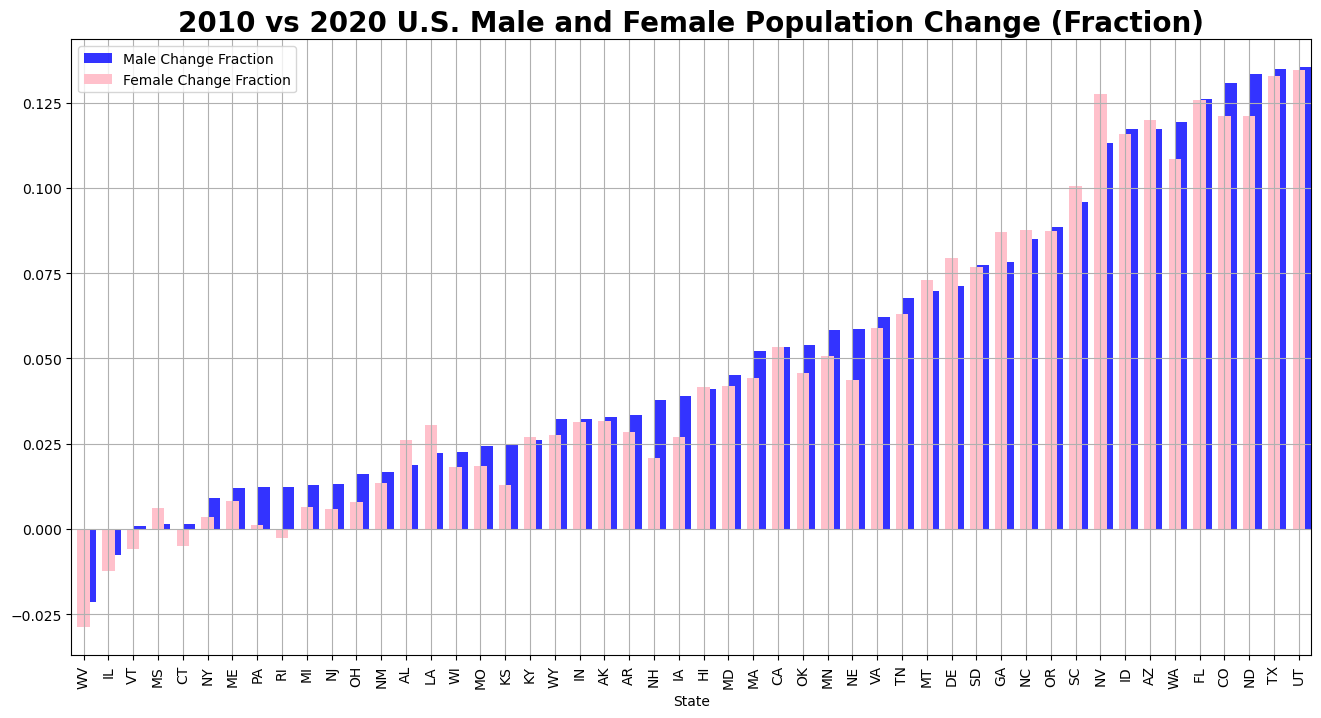

In [26]:
plt.figure(figsize=(16,8))
dfnew.plot.bar(x='State',y='Male Change Fraction',ax=plt.gca(), color='blue', alpha=0.8, align='edge')
dfnew.plot.bar(x='State', y='Female Change Fraction', ax=plt.gca(), color='pink', alpha=1.0, align='center')
plt.title("2010 vs 2020 U.S. Male and Female Population Change (Fraction)", fontsize=20, fontweight ='bold')
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.grid()

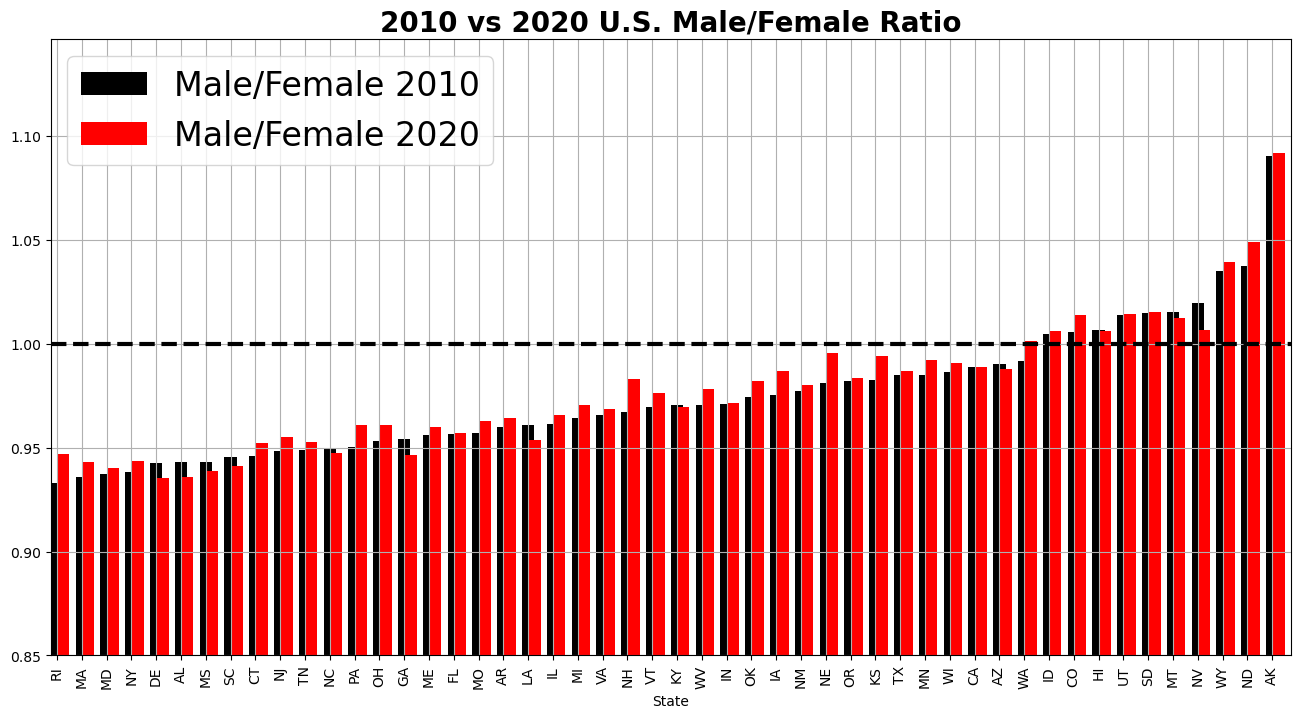

In [306]:
dfnew = dfnew.sort_values(by=['Male/Female 2010','Male/Female 2020'], ascending=True)


plt.figure(figsize=(16,8))
dfnew.plot.bar(x='State', y='Male/Female 2010',ax=plt.gca(), color='black', alpha=1.0, align='center')
dfnew.plot.bar(x='State', y='Male/Female 2020', ax=plt.gca(), color='red', alpha=1.0, align='edge')
plt.title("2010 vs 2020 U.S. Male/Female Ratio", fontsize=20, fontweight ='bold')
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.legend(fontsize=24)
plt.ylim(0.85)
plt.axhline(y=1.0, color='k', linestyle='--', linewidth=3)
plt.grid()

# Black --> Red, increases --> % of men increased
# Black --> Red, decreases --> % of women increased

#### Median Income

In [28]:
# Sorting the dataframe from lowest to highest so it graphs nicer
dfnew = dfnew.sort_values(by=['Median Income Change'], ascending=True)
#dfnew

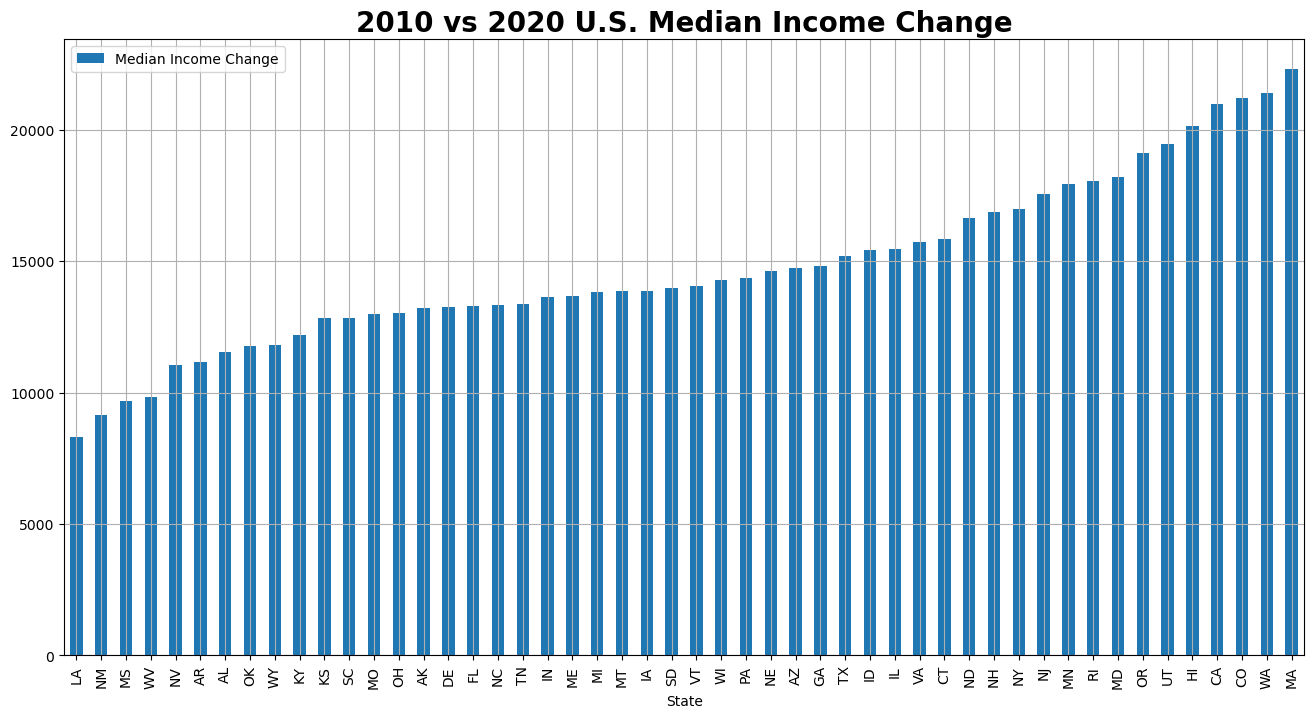

In [29]:
plt.figure(figsize=(16,8))
dfnew.plot.bar(x='State',y='Median Income Change',ax=plt.gca())
plt.title("2010 vs 2020 U.S. Median Income Change", fontsize=20, fontweight ='bold')
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.grid()

In [30]:
# Sorting the dataframe from lowest to highest so it graphs nicer
dfnew = dfnew.sort_values(by=['Median Income Change Fraction'], ascending=True)
#dfnew

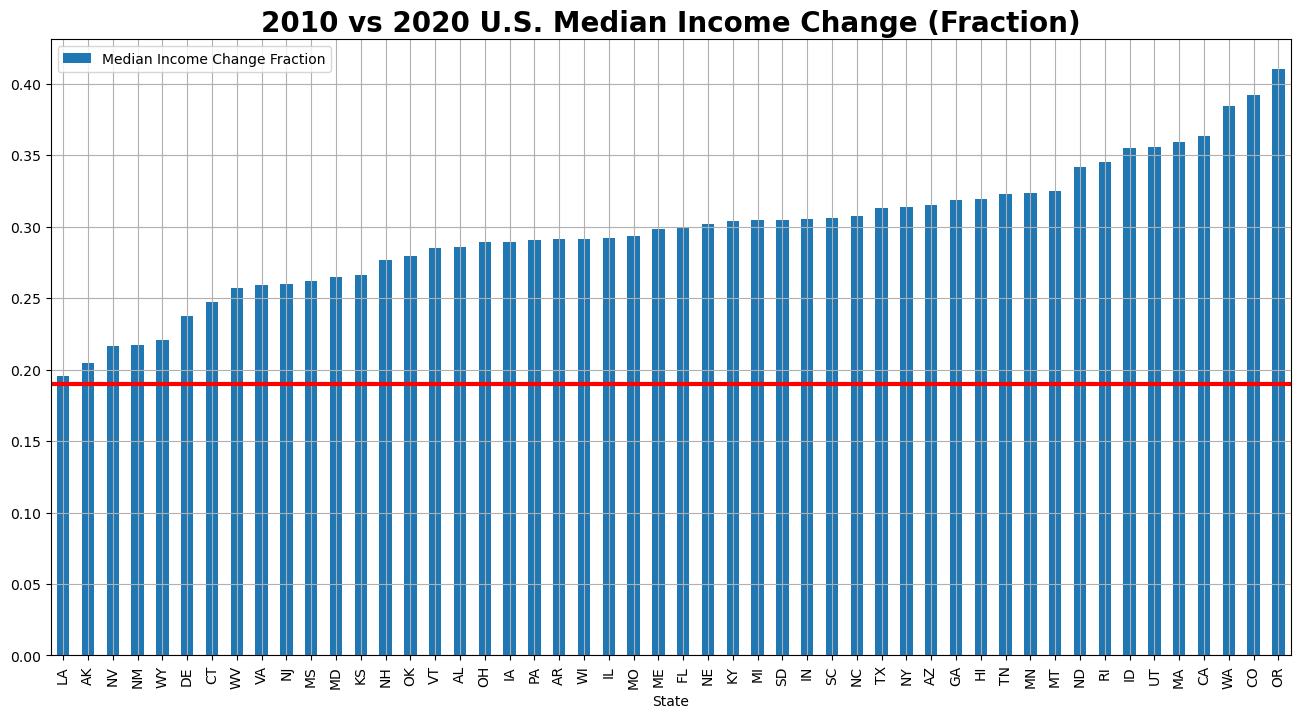

In [31]:
plt.figure(figsize=(16,8))
dfnew.plot.bar(x='State',y='Median Income Change Fraction',ax=plt.gca())
plt.title("2010 vs 2020 U.S. Median Income Change (Fraction)", fontsize=20, fontweight ='bold')
plt.axhline(y=0.19, color='r', linewidth=3)
plt.grid()

#### Mean Income

In [32]:
# Sorting the dataframe from lowest to highest so it graphs nicer
dfnew = dfnew.sort_values(by=['Mean Income Change'], ascending=True)
#dfnew

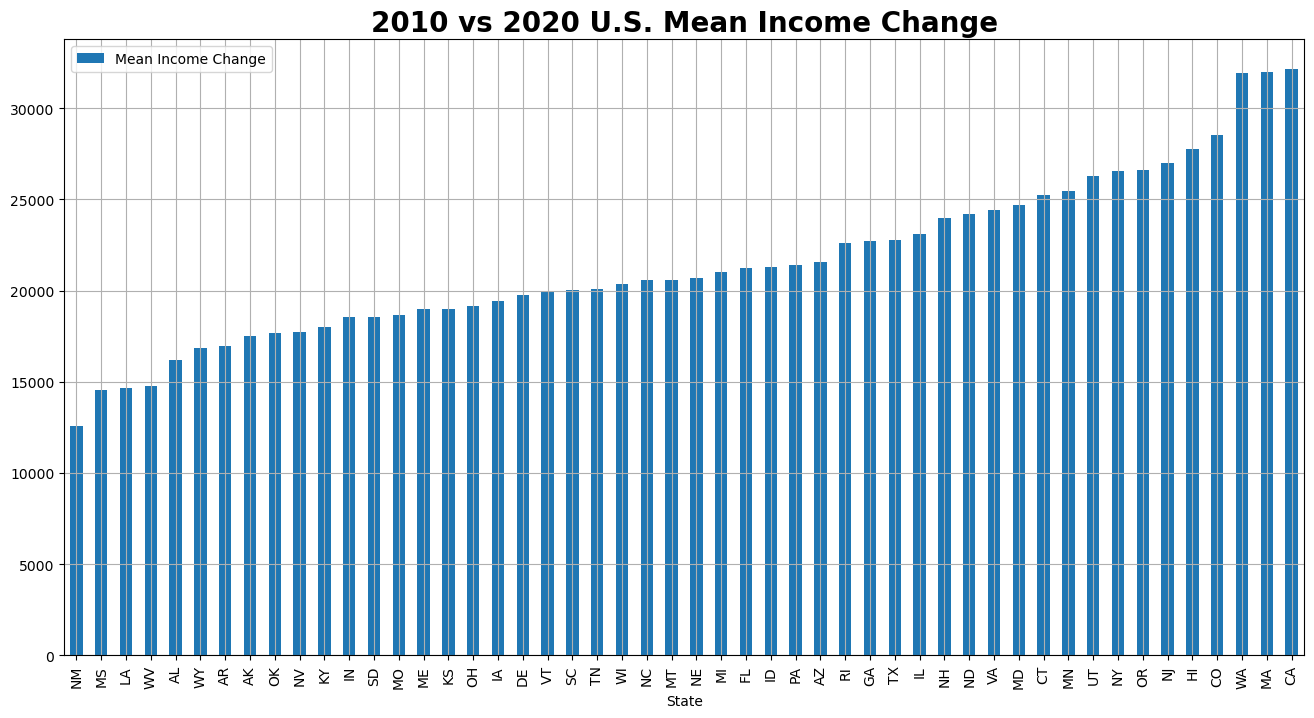

In [33]:
plt.figure(figsize=(16,8))
dfnew.plot.bar(x='State',y='Mean Income Change',ax=plt.gca())
plt.title("2010 vs 2020 U.S. Mean Income Change", fontsize=20, fontweight ='bold')
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.grid()

In [34]:
# Sorting the dataframe from lowest to highest so it graphs nicer
dfnew = dfnew.sort_values(by=['Mean Income Change Fraction'], ascending=True)
#dfnew

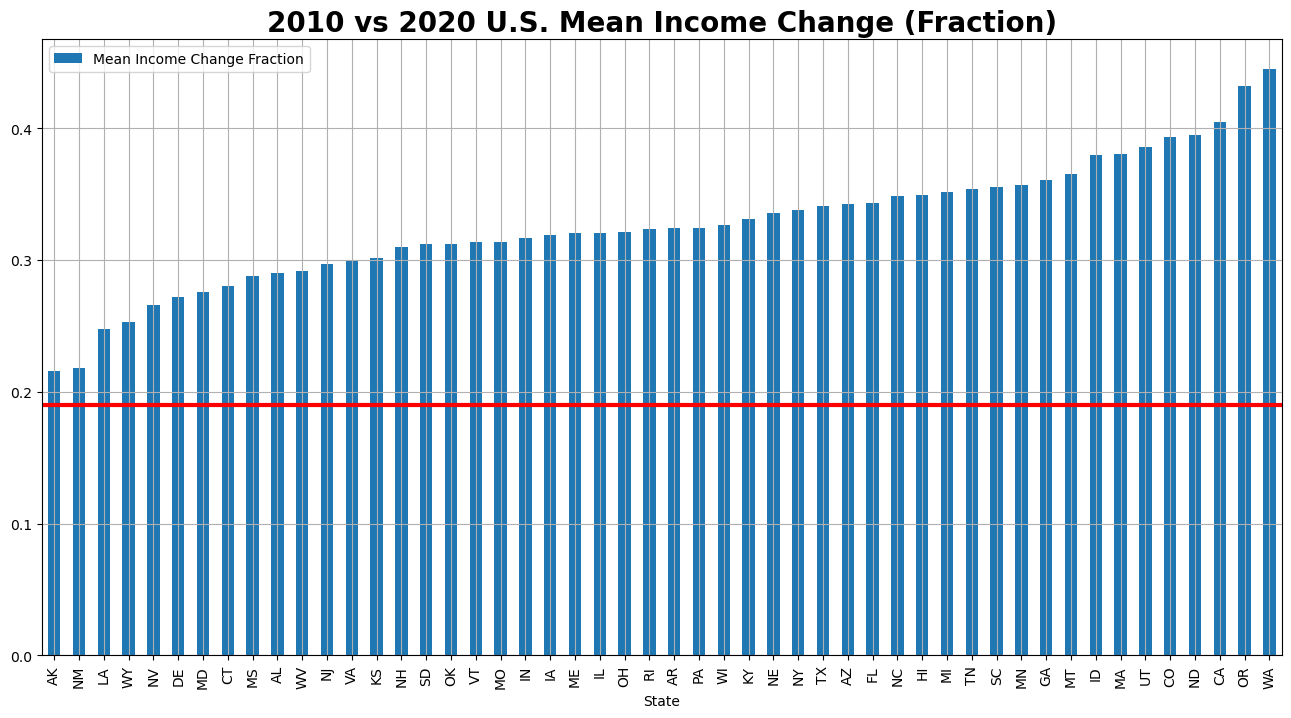

In [35]:
plt.figure(figsize=(16,8))
dfnew.plot.bar(x='State',y='Mean Income Change Fraction',ax=plt.gca())
plt.title("2010 vs 2020 U.S. Mean Income Change (Fraction)", fontsize=20, fontweight ='bold')
plt.axhline(y=0.19, color='r', linewidth=3)
plt.grid()

#### Racial (Black or African American, White)

##### Black or African American

In [36]:
# Sorting the dataframe from lowest to highest so it graphs nicer
dfnew = dfnew.sort_values(by=['Black or African American Change'], ascending=True)
#dfnew

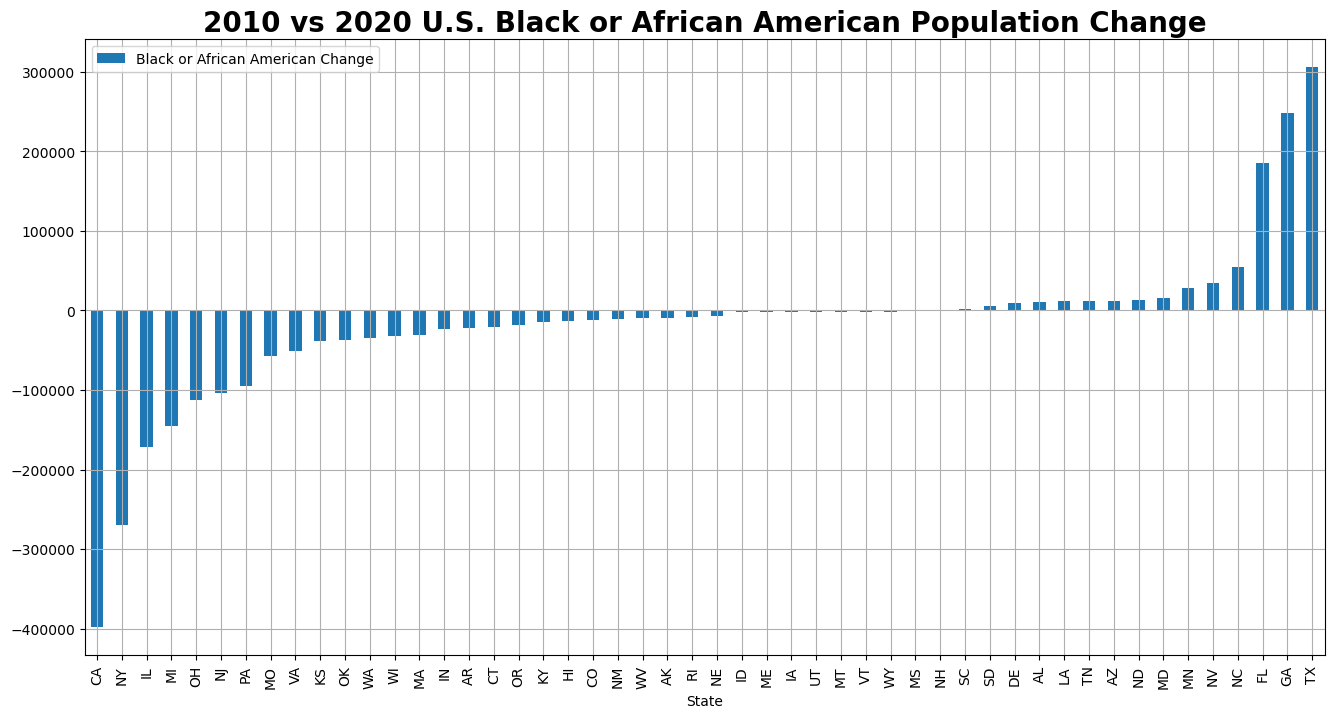

In [37]:
plt.figure(figsize=(16,8))
dfnew.plot.bar(x='State',y='Black or African American Change',ax=plt.gca())
plt.title("2010 vs 2020 U.S. Black or African American Population Change", fontsize=20, fontweight ='bold')
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.grid()

In [38]:
# Sorting the dataframe from lowest to highest so it graphs nicer
dfnew = dfnew.sort_values(by=['Black or African American Change Fraction'], ascending=True)
#dfnew

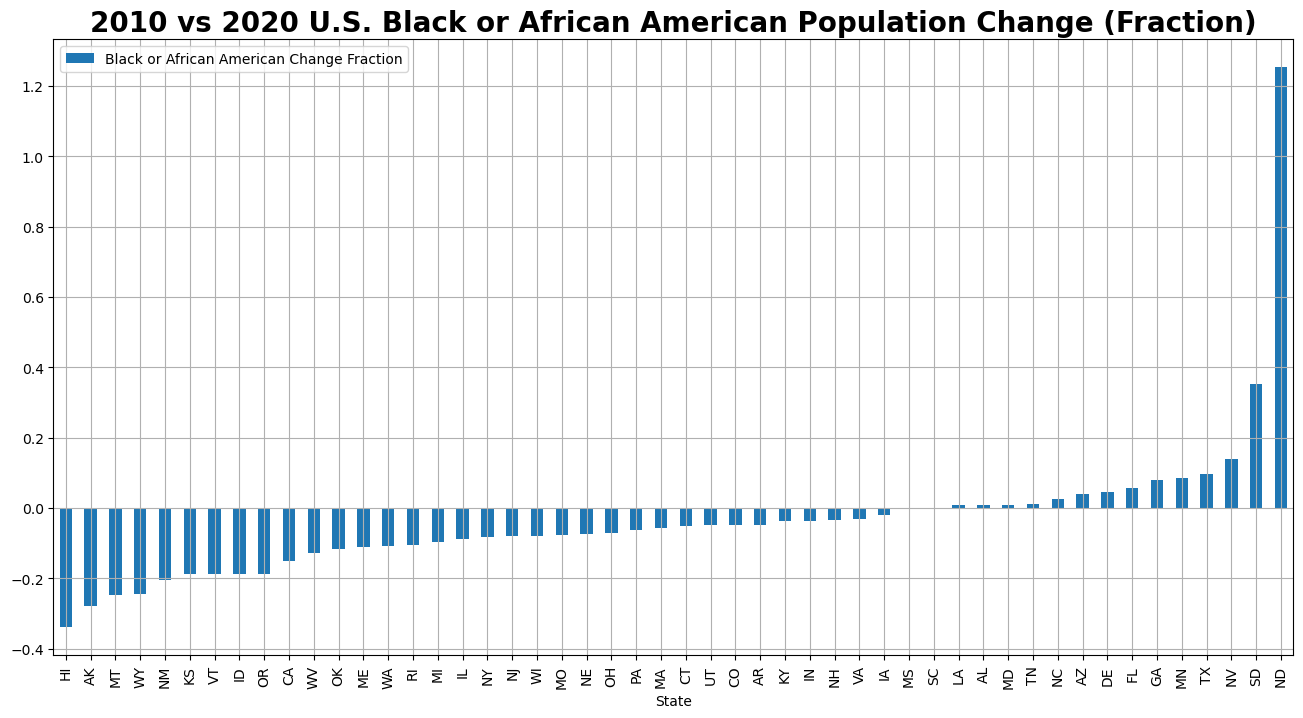

In [39]:
plt.figure(figsize=(16,8))
dfnew.plot.bar(x='State',y='Black or African American Change Fraction',ax=plt.gca())
plt.title("2010 vs 2020 U.S. Black or African American Population Change (Fraction)", fontsize=20, fontweight ='bold')
plt.grid()

##### White

In [40]:
# Sorting the dataframe from lowest to highest so it graphs nicer
dfnew = dfnew.sort_values(by=['White Change'], ascending=True)
#dfnew

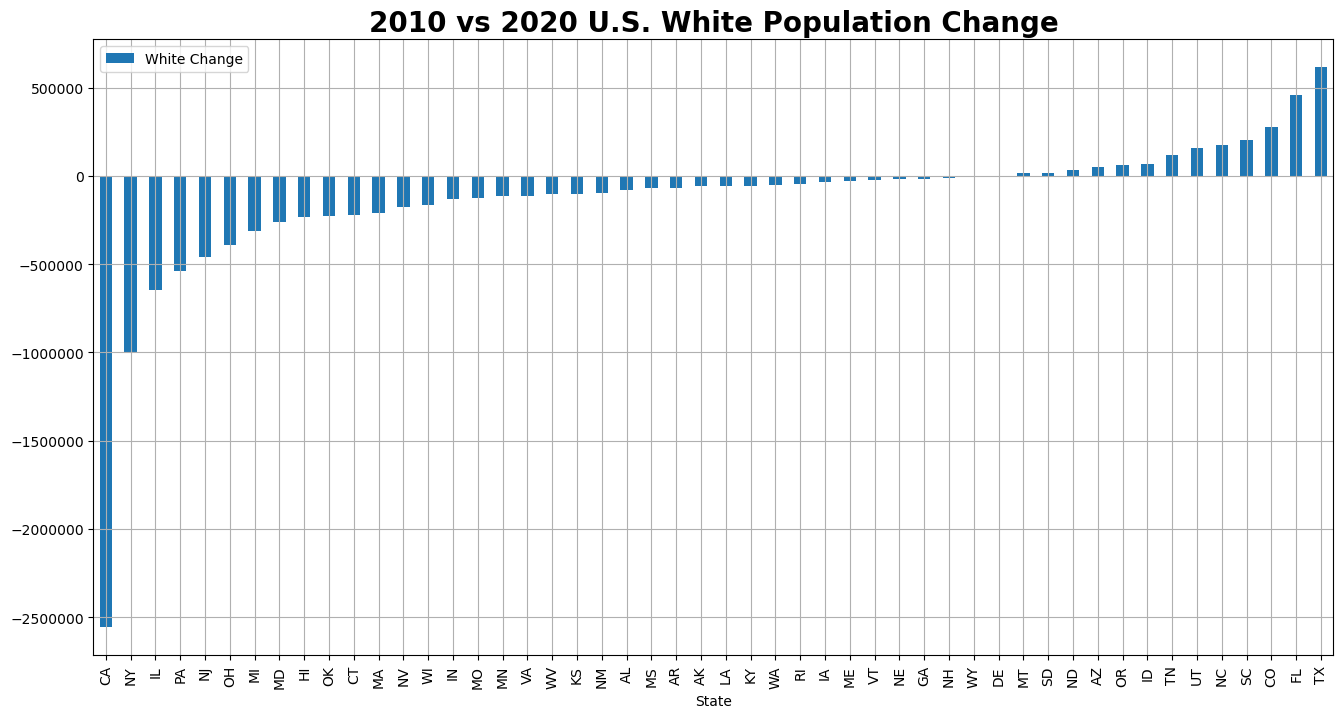

In [41]:
plt.figure(figsize=(16,8))
dfnew.plot.bar(x='State',y='White Change',ax=plt.gca())
plt.title("2010 vs 2020 U.S. White Population Change", fontsize=20, fontweight ='bold')
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.grid()

In [42]:
# Sorting the dataframe from lowest to highest so it graphs nicer
dfnew = dfnew.sort_values(by=['White Change Fraction'], ascending=True)
#dfnew

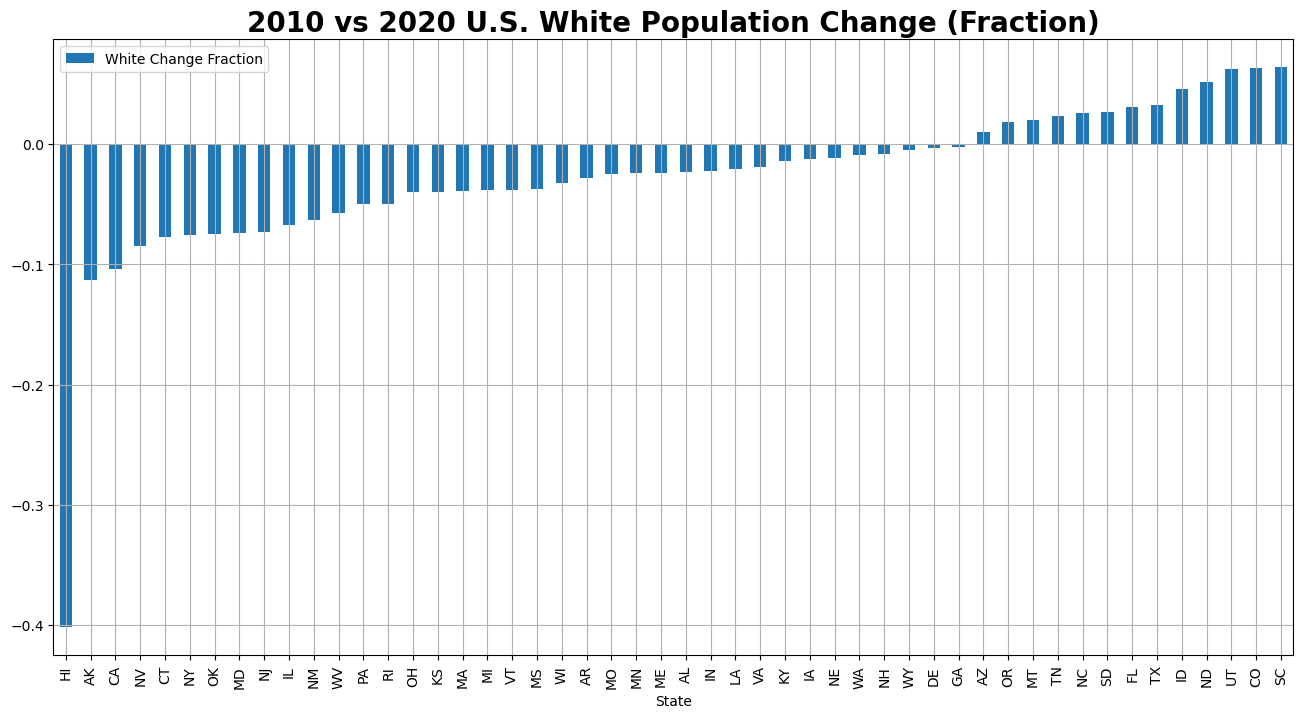

In [43]:
plt.figure(figsize=(16,8))
dfnew.plot.bar(x='State',y='White Change Fraction',ax=plt.gca())
plt.title("2010 vs 2020 U.S. White Population Change (Fraction)", fontsize=20, fontweight ='bold')
plt.grid()

##### White/Black Same Graph

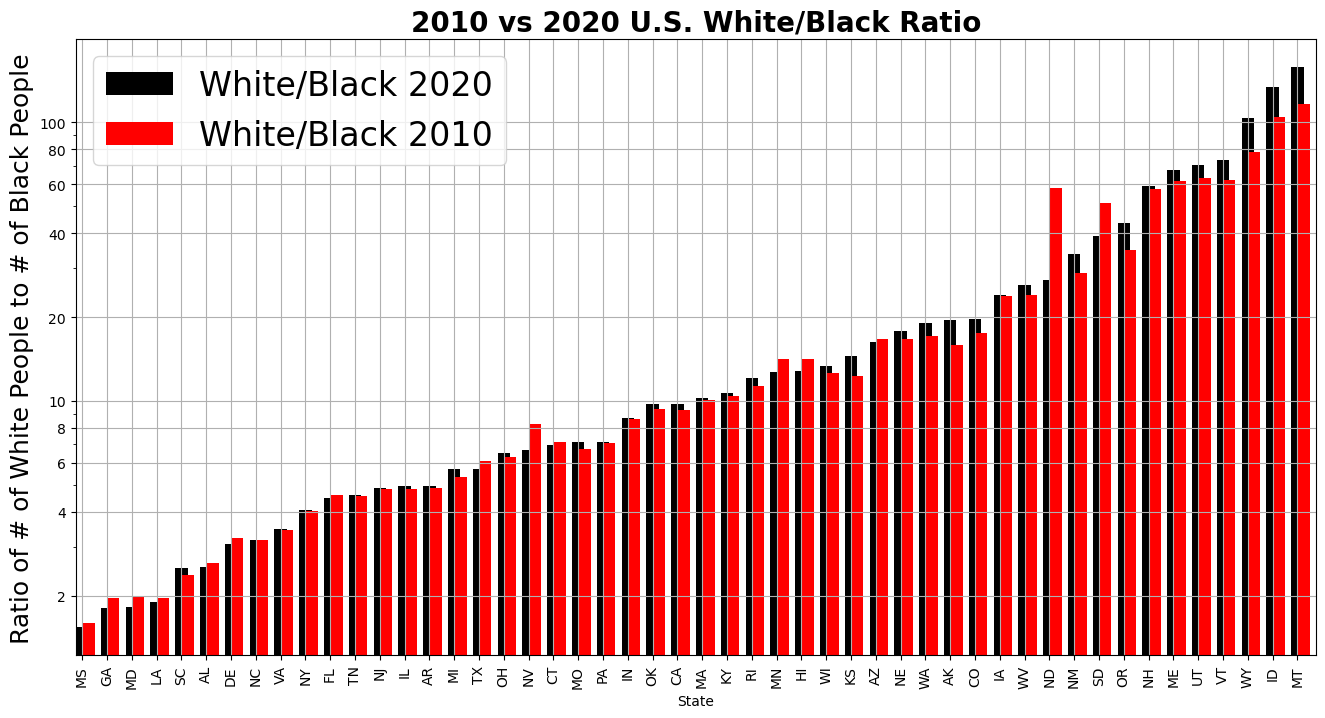

In [305]:
dfnew = dfnew.sort_values(by=['White/Black 2020','White/Black 2010'], ascending=True)


plt.figure(figsize=(16,8))
dfnew.plot.bar(x='State', y='White/Black 2020', ax=plt.gca(), color='black', alpha=1.0, align='center')
dfnew.plot.bar(x='State', y='White/Black 2010',ax=plt.gca(), color='red', alpha=1.0, align='edge')
plt.title("2010 vs 2020 U.S. White/Black Ratio", fontsize=20, fontweight ='bold')
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.legend(fontsize=24)

plt.yscale('log')
plt.yticks([2, 4, 6, 8, 10, 20, 40, 60, 80, 100])#, fontsize=18)
#plt.locator_params(axis='y', bins=10)
plt.gca().get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.ylabel('Ratio of # of White People to # of Black People',fontsize=18)
plt.grid()

## State Clustering

### 2020 Clustering Graph

In [307]:
# Use only some

features = ['Male/Female 2020', 'Black Fraction 2020', 'White Fraction 2020', 'Median Income 2020', 'Mean Income 2020']

print(features)

['Male/Female 2020', 'Black Fraction 2020', 'White Fraction 2020', 'Median Income 2020', 'Mean Income 2020']


<Figure size 2400x2400 with 0 Axes>

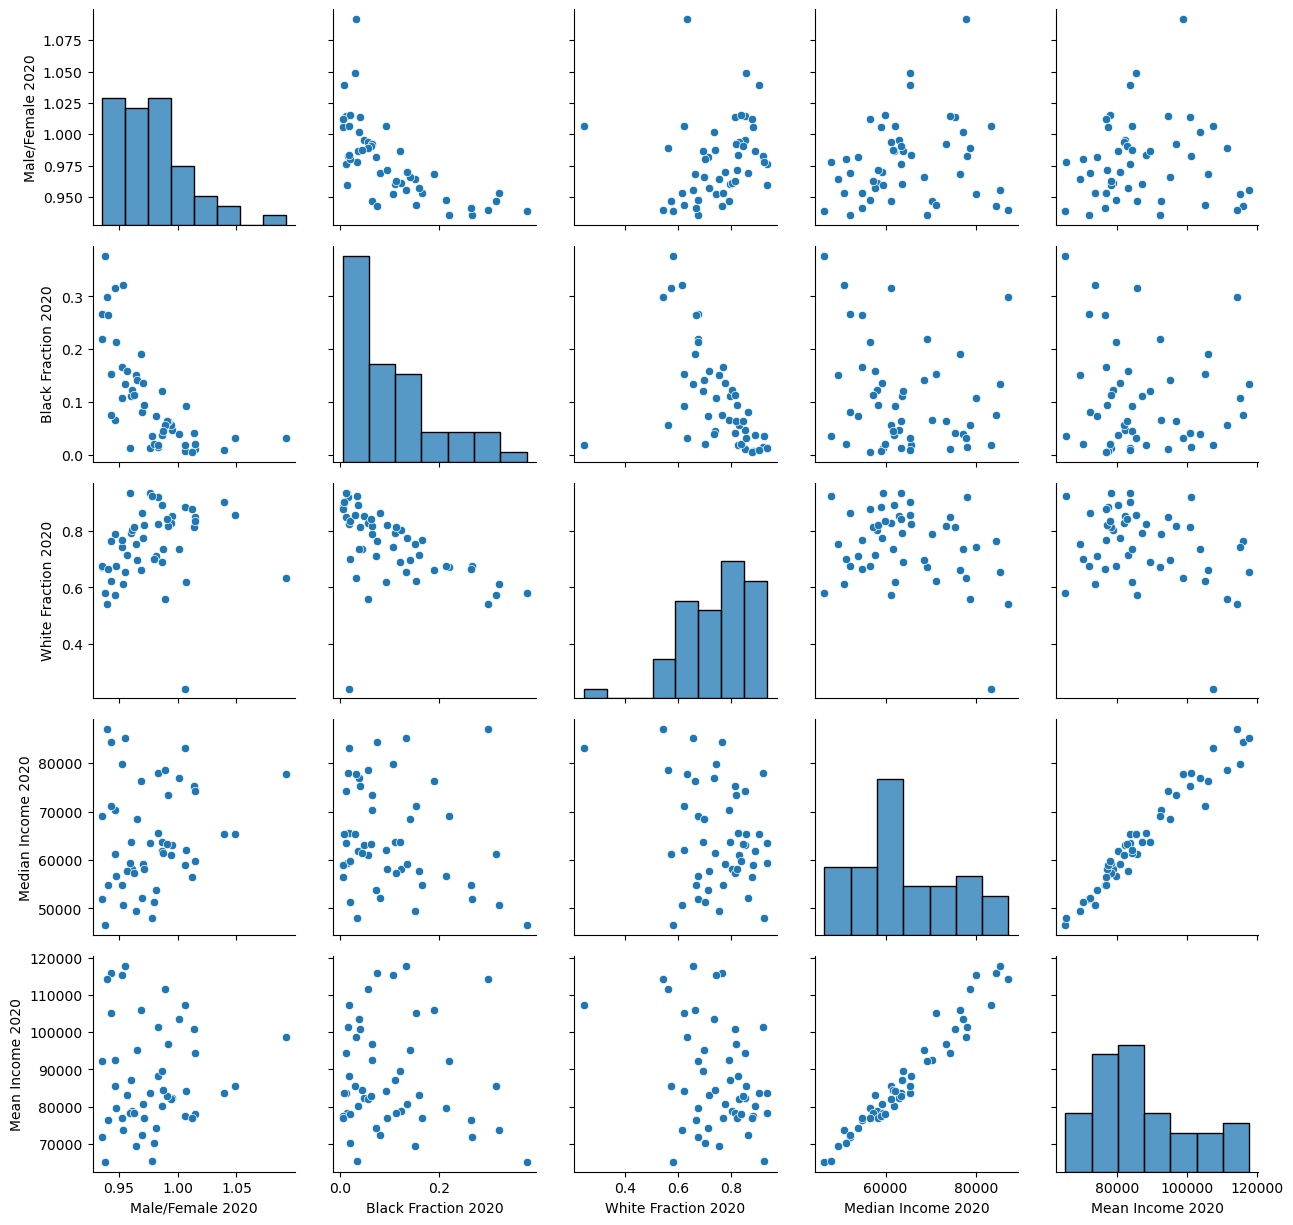

In [308]:
# Use only some
plt.figure(figsize=(24,24))

g = sns.PairGrid(dfnew[features])

g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [309]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [310]:
X = dfnew[features].values

In [311]:
# Create the model with some number of clusters
# Choose the initial centroids at random
# Run it with 10 different centroid seeds
# Set the random seed to something deterministic (0 in this case)
model = KMeans(n_clusters=3, init='random', n_init=10, random_state=0)

# Run the clustering algorithm! 
labels_km = model.fit_predict(X)

In [312]:
labels_km

array([1, 0, 0, 0, 1, 2, 2, 2, 0, 0, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1,
       0, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 0, 0,
       2, 2, 1, 1, 1, 0])

In [313]:
print(model.cluster_centers_)

[[9.85344468e-01 8.84976927e-02 6.83232860e-01 7.86740714e+04
  1.06405214e+05]
 [9.82142112e-01 9.36509502e-02 7.78282437e-01 6.36681667e+04
  8.57456111e+04]
 [9.68462453e-01 1.30591006e-01 7.72430983e-01 5.43887778e+04
  7.44283333e+04]]


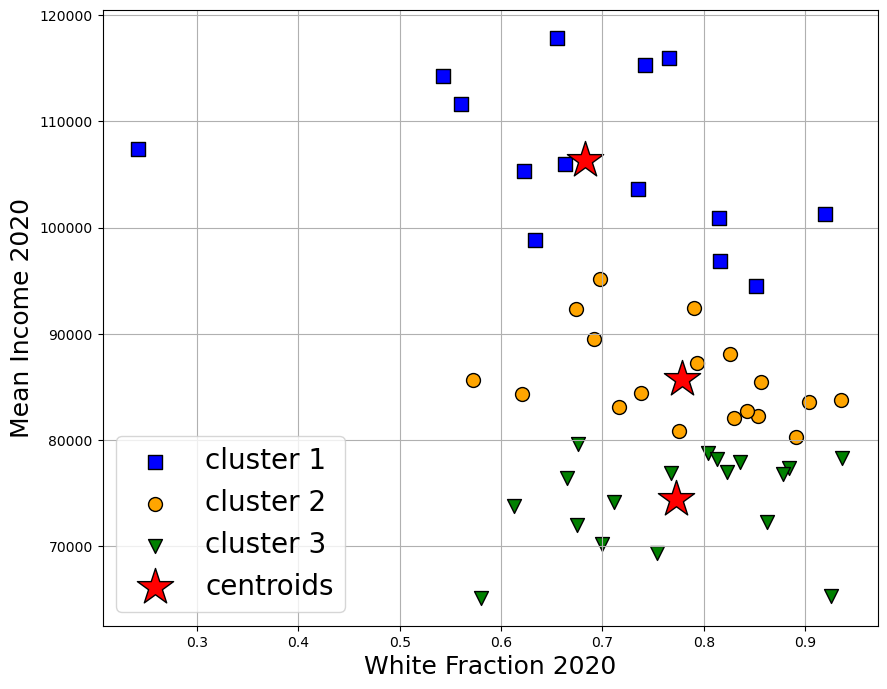

In [314]:
plt.figure(figsize=(10,8))

idx0 = 2
idx1 = 4

label0 = features[idx0]
label1 = features[idx1]


# Plot the 3 clusters, making use of masking to display the first
# two features (the 0th and 1st column), plotted versus each other
plt.scatter(
    X[labels_km == 0, idx0], X[labels_km == 0, idx1],
    s=100, c='blue',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[labels_km == 1, idx0], X[labels_km == 1, idx1],
    s=100, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[labels_km == 2, idx0], X[labels_km == 2, idx1],
    s=100, c='green',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# Plot the centroids
plt.scatter(
    model.cluster_centers_[:, idx0], model.cluster_centers_[:, idx1],
    s=750, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.xlabel(label0,fontsize=18)
plt.ylabel(label1, fontsize=18)
plt.legend(scatterpoints=1, fontsize=20)
plt.grid()

In [315]:
labels_km
states = dfnew['State']

vals = np.unique(labels_km)
print(vals)

for v in vals:
    print(f"{v} ------\n")
    print(states[labels_km==v].values)

#print(states)

[0 1 2]
0 ------

['MA' 'MD' 'NY' 'CT' 'NJ' 'VA' 'NH' 'MN' 'CA' 'WA' 'CO' 'HI' 'UT' 'AK']
1 ------

['RI' 'DE' 'PA' 'GA' 'FL' 'IL' 'MI' 'VT' 'IA' 'NE' 'OR' 'KS' 'TX' 'WI'
 'AZ' 'NV' 'WY' 'ND']
2 ------

['AL' 'MS' 'SC' 'TN' 'NC' 'OH' 'ME' 'MO' 'AR' 'LA' 'KY' 'WV' 'IN' 'OK'
 'NM' 'ID' 'SD' 'MT']


In [316]:
dfnewMap = dfnew.copy(deep=True)
dfnewMap['KM Labels'] = labels_km
#dfnewMap

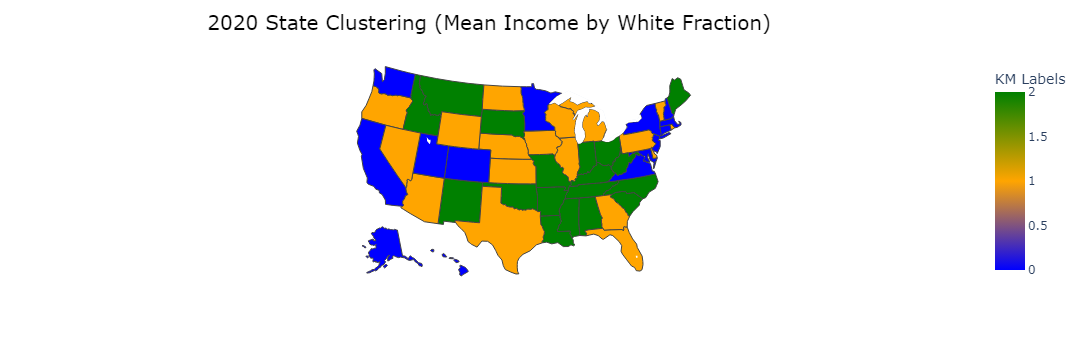

In [320]:
fig = px.choropleth(dfnewMap,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='KM Labels',
                    color_continuous_scale=["blue", "orange", "green"])
fig.update_layout(
      title_text = '2020 State Clustering (Mean Income by White Fraction)',
      title_font_size = 20,
      title_font_color="black", 
      title_x=0.45)
fig.show()

### 2010 - 2020 Change Clustering Graph (Not Using)

In [250]:
#features = dfnew.columns.values
features = ['Population Change', 'Population Change Fraction', 'Male Change', 'Male Change Fraction',
           'Female Change', 'Female Change Fraction', 'Median Income Change', 'Median Income Change Fraction',
           'Mean Income Change', 'Mean Income Change Fraction', 'White Change', 'White Change Fraction',
           'Black or African American Change', 'Black or African American Change Fraction']

print(features)

['Population Change', 'Population Change Fraction', 'Male Change', 'Male Change Fraction', 'Female Change', 'Female Change Fraction', 'Median Income Change', 'Median Income Change Fraction', 'Mean Income Change', 'Mean Income Change Fraction', 'White Change', 'White Change Fraction', 'Black or African American Change', 'Black or African American Change Fraction']


<Figure size 2400x2400 with 0 Axes>

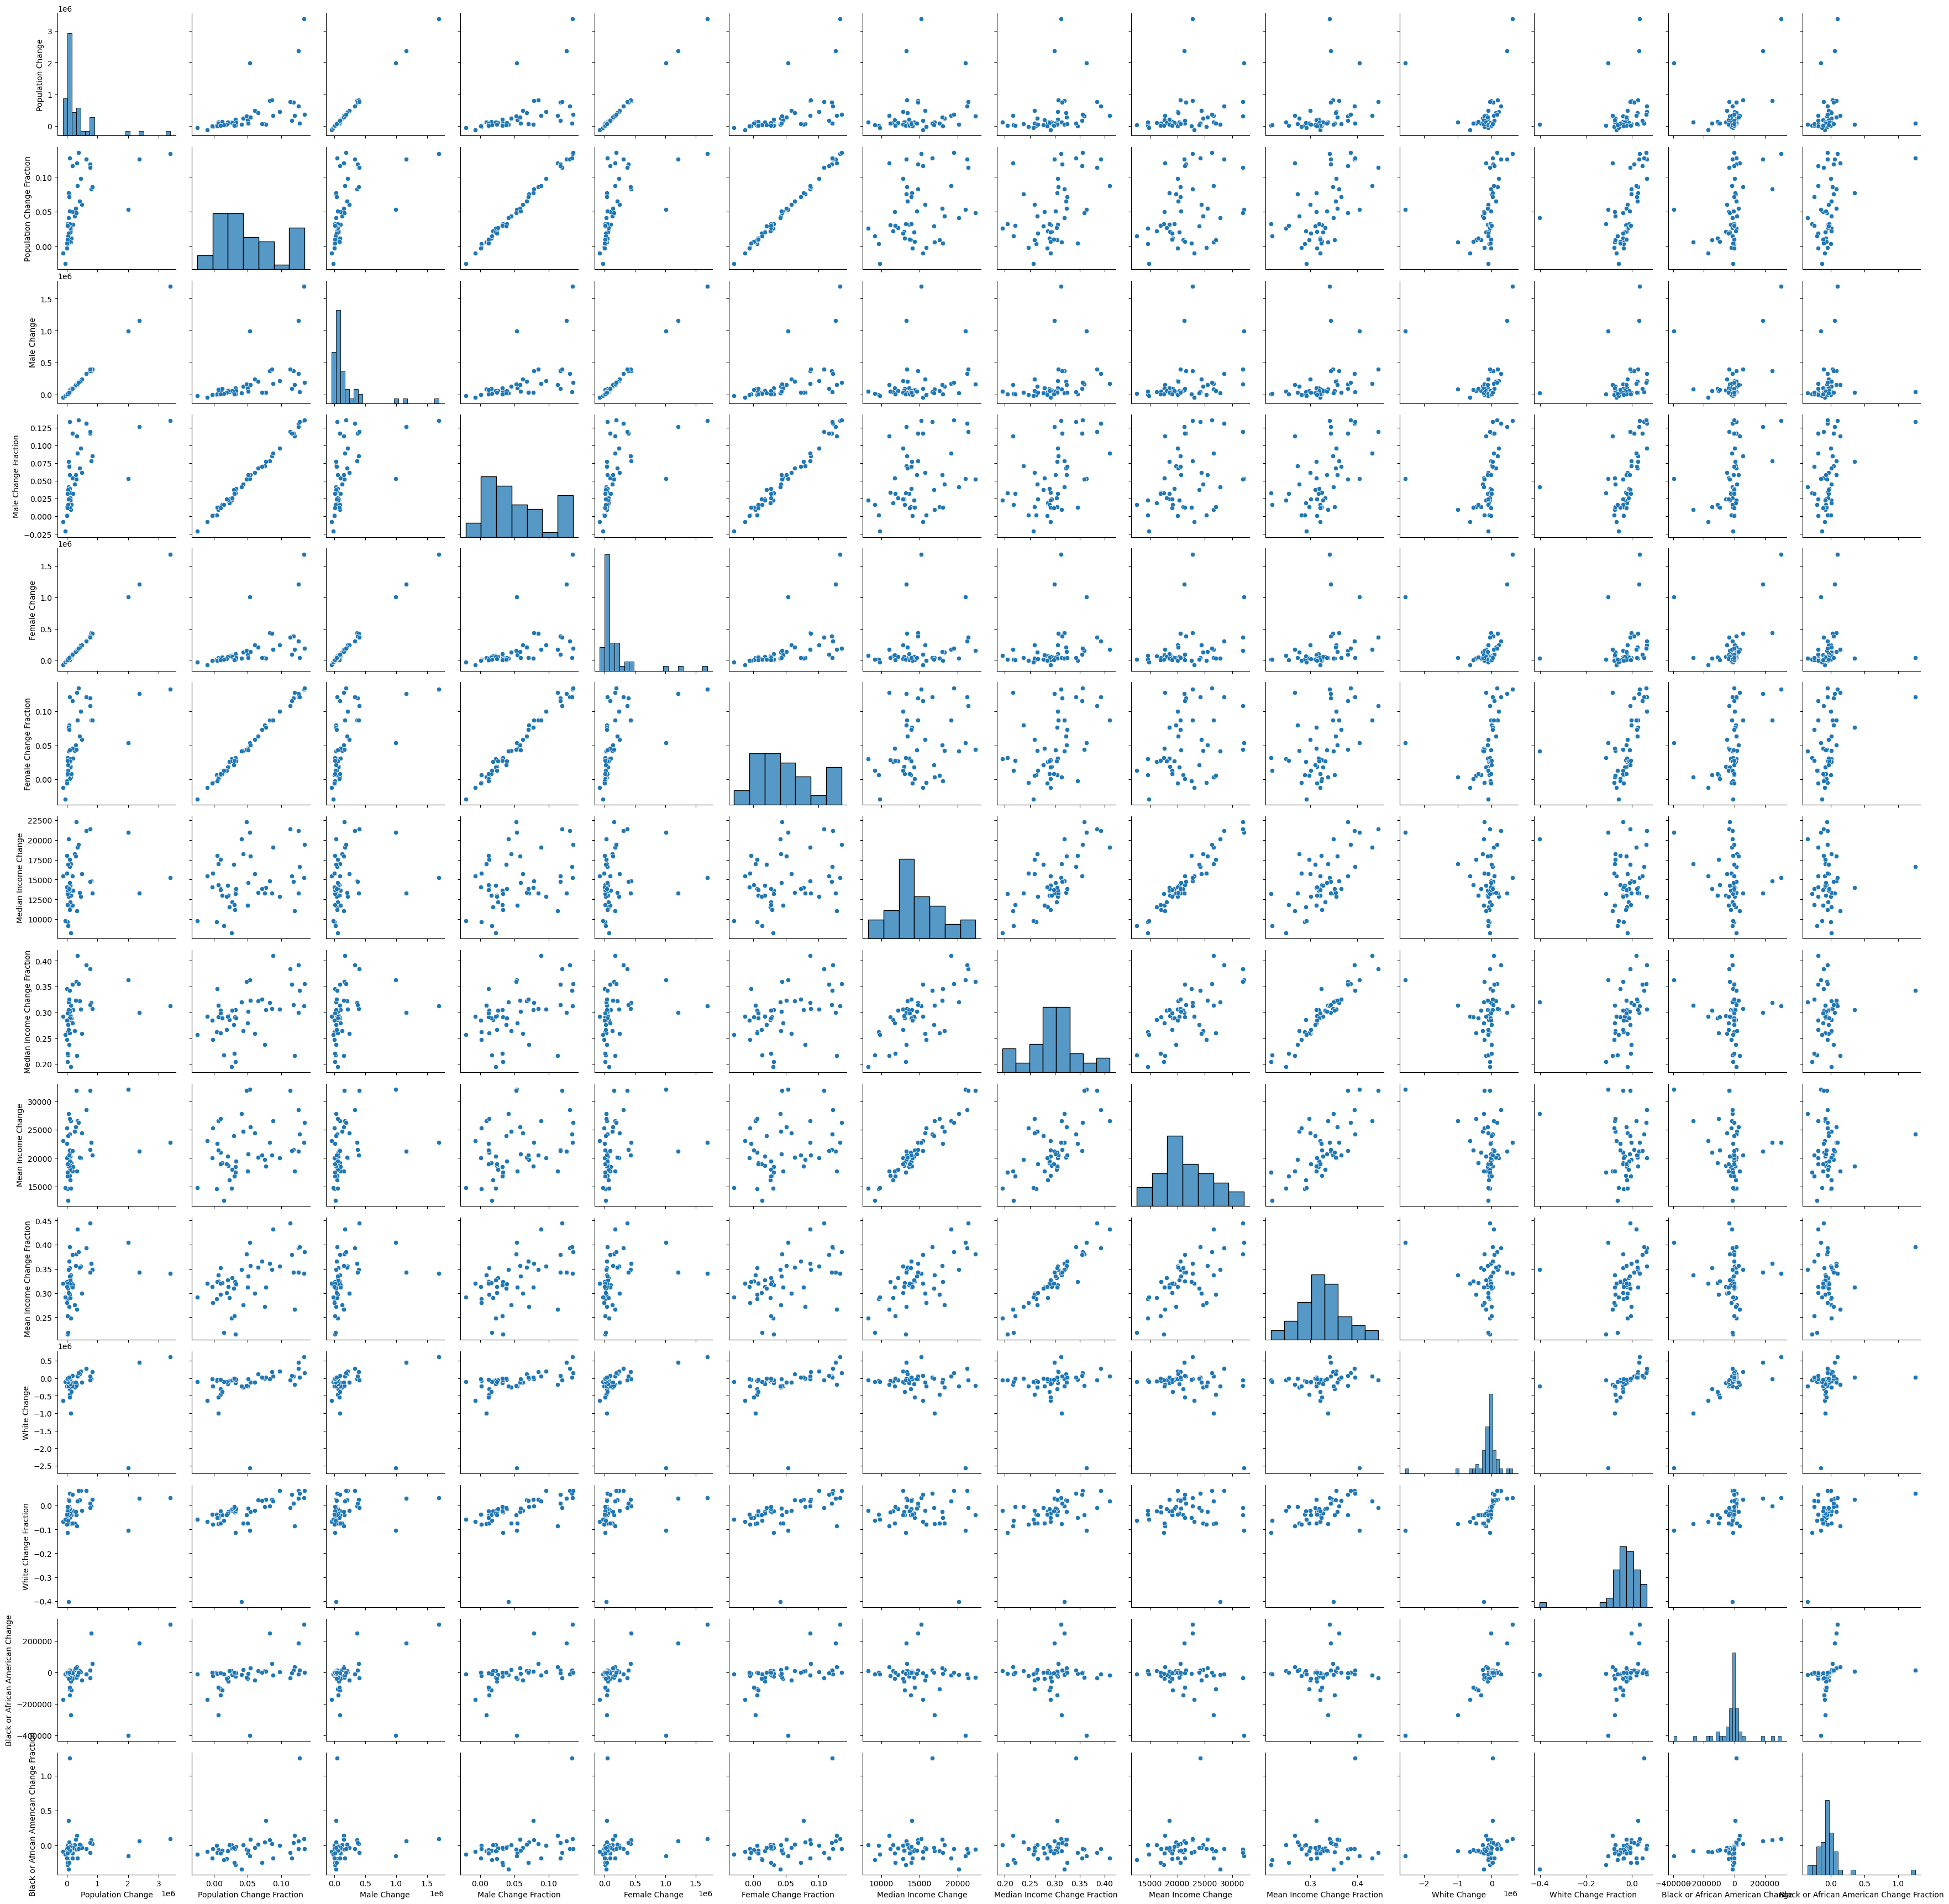

In [251]:
# Use only some
plt.figure(figsize=(24,24))

g = sns.PairGrid(dfnew[features])

g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [252]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [253]:
X = dfnew[features].values

In [259]:
# Create the model with some number of clusters
# Choose the initial centroids at random
# Run it with 10 different centroid seeds
# Set the random seed to something deterministic (0 in this case)
model = KMeans(n_clusters=3, init='random', n_init=10, random_state=0)

# Run the clustering algorithm! 
labels_km = model.fit_predict(X)

In [260]:
labels_km

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [261]:
print(model.cluster_centers_)

[[ 2.87596300e+06  1.29861200e-01  1.42602300e+06  1.30497546e-01
   1.44994000e+06  1.29236970e-01  1.42525000e+04  3.06120352e-01
   2.19885000e+04  3.41922437e-01  5.35370000e+05  3.14838129e-02
   2.45430000e+05  7.73538005e-02]
 [ 1.99666000e+06  5.34590108e-02  9.92377000e+05  5.34383421e-02
   1.00428300e+06  5.34794501e-02  2.09640000e+04  3.63277189e-01
   3.21570000e+04  4.04668722e-01 -2.55757000e+06 -1.03918563e-01
  -3.98460000e+05 -1.50395067e-01]
 [ 1.99436426e+05  4.70699728e-02  1.02920191e+05  4.88951727e-02
   9.65162340e+04  4.52957869e-02  1.46646809e+04  2.95394121e-01
   2.12801277e+04  3.24577487e-01 -1.07751872e+05 -2.92636073e-02
  -1.93859362e+04 -3.61395119e-02]]


In [262]:
features[11]

'White Change Fraction'

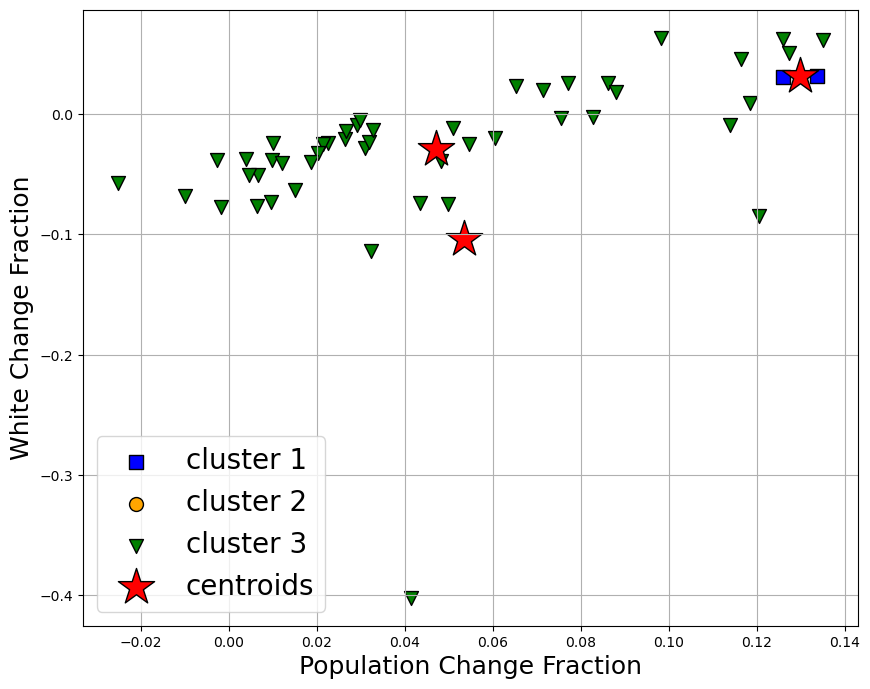

In [263]:
plt.figure(figsize=(10,8))

idx0 = 1
idx1 = 11

label0 = features[idx0]
label1 = features[idx1]


# Plot the 3 clusters, making use of masking to display the first
# two features (the 0th and 1st column), plotted versus each other
plt.scatter(
    X[labels_km == 0, idx0], X[labels_km == 0, idx1],
    s=100, c='blue',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[labels_km == 1, idx0], X[labels_km == 1, idx1],
    s=100, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[labels_km == 2, idx0], X[labels_km == 2, idx1],
    s=100, c='green',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# Plot the centroids
plt.scatter(
    model.cluster_centers_[:, idx0], model.cluster_centers_[:, idx1],
    s=750, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.xlabel(label0,fontsize=18)
plt.ylabel(label1, fontsize=18)
plt.legend(scatterpoints=1, fontsize=20)
plt.grid()

In [264]:
labels_km
states = dfnew['State']

vals = np.unique(labels_km)
print(vals)

for v in vals:
    print(f"{v} ------\n")
    print(states[labels_km==v].values)

#print(states)

[0 1 2]
0 ------

['FL' 'TX']
1 ------

['CA']
2 ------

['MS' 'GA' 'MD' 'LA' 'SC' 'AL' 'DE' 'NC' 'VA' 'NY' 'TN' 'NJ' 'IL' 'AR'
 'MI' 'OH' 'NV' 'CT' 'MO' 'PA' 'IN' 'OK' 'MA' 'KY' 'RI' 'MN' 'HI' 'WI'
 'KS' 'AZ' 'NE' 'WA' 'AK' 'CO' 'IA' 'WV' 'ND' 'NM' 'SD' 'OR' 'NH' 'ME'
 'UT' 'VT' 'WY' 'ID' 'MT']


In [265]:
dfnewMap = dfnew.copy(deep=True)
dfnewMap['KM Labels'] = labels_km
#dfnewMap

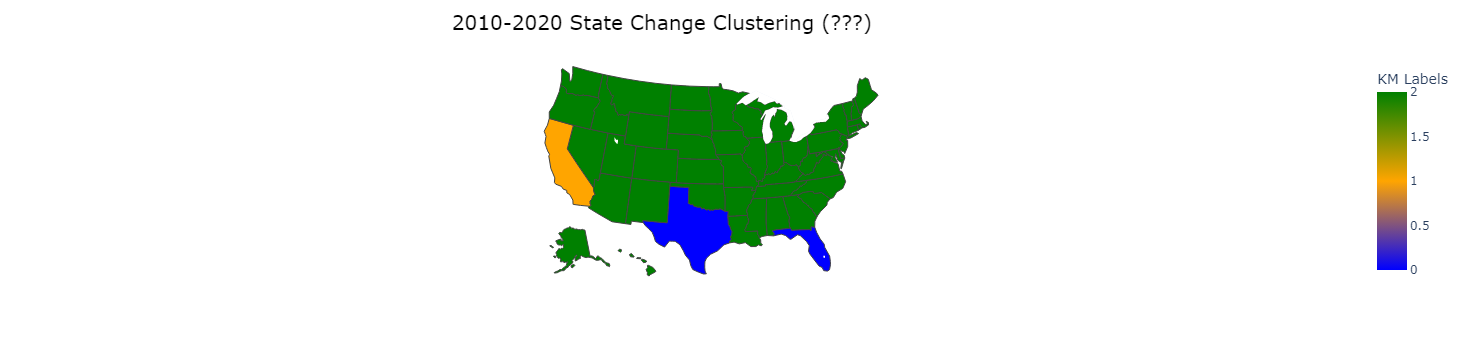

In [266]:
fig = px.choropleth(dfnewMap,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='KM Labels',
                    color_continuous_scale=["blue", "orange", "green"])
fig.update_layout(
      title_text = '2010-2020 State Change Clustering (???)',
      title_font_size = 20,
      title_font_color="black", 
      title_x=0.45)
fig.show()

### 3-D Graph if Wanted

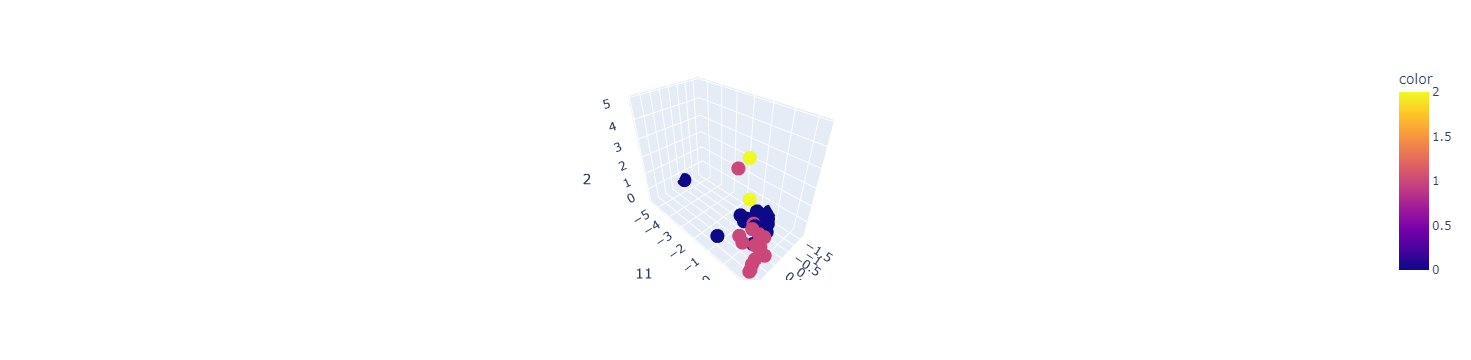

In [185]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px

X_std = StandardScaler().fit_transform(dfnew[features])

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
X = StandardScaler().fit_transform(dfnew[features])
y_km = km.fit_predict(X)
fig = px.scatter_3d(X_std, x=1, y=11, z=2, color=y_km)
fig.show()

### 2010-2020 Change With Less Features

In [324]:
#features = dfnew.columns.values
features = ['Population Change Fraction', 'Mean Income Change', 'Mean Income Change Fraction']

print(features)

['Population Change Fraction', 'Mean Income Change', 'Mean Income Change Fraction']


<Figure size 2400x2400 with 0 Axes>

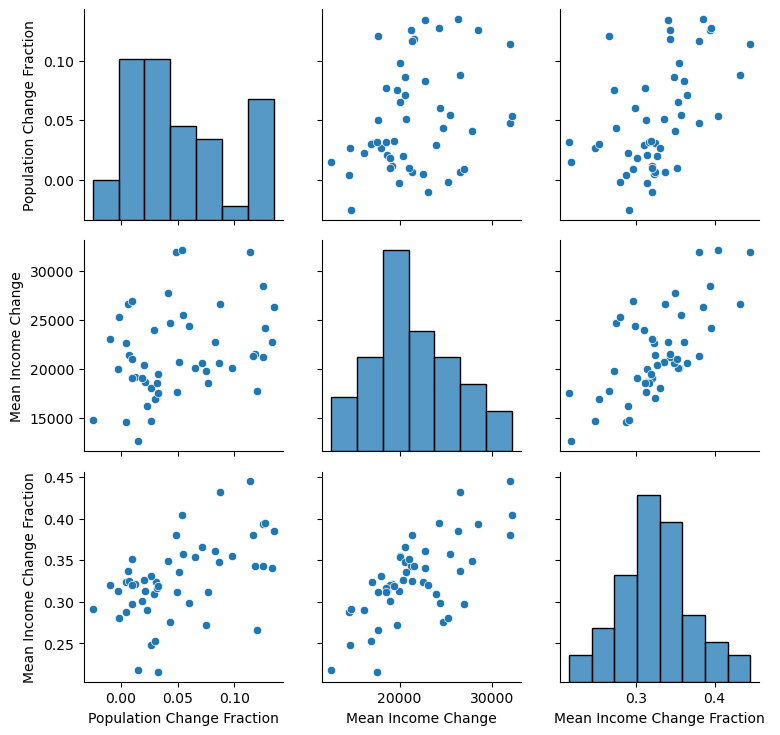

In [325]:
# Use only some
plt.figure(figsize=(24,24))

g = sns.PairGrid(dfnew[features])

g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [326]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [327]:
X = dfnew[features].values

In [328]:
# Create the model with some number of clusters
# Choose the initial centroids at random
# Run it with 10 different centroid seeds
# Set the random seed to something deterministic (0 in this case)
model = KMeans(n_clusters=3, init='random', n_init=10, random_state=0)

# Run the clustering algorithm! 
labels_km = model.fit_predict(X)

In [329]:
labels_km

array([2, 1, 2, 1, 2, 0, 0, 2, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1,
       0, 2, 0, 0, 2, 0])

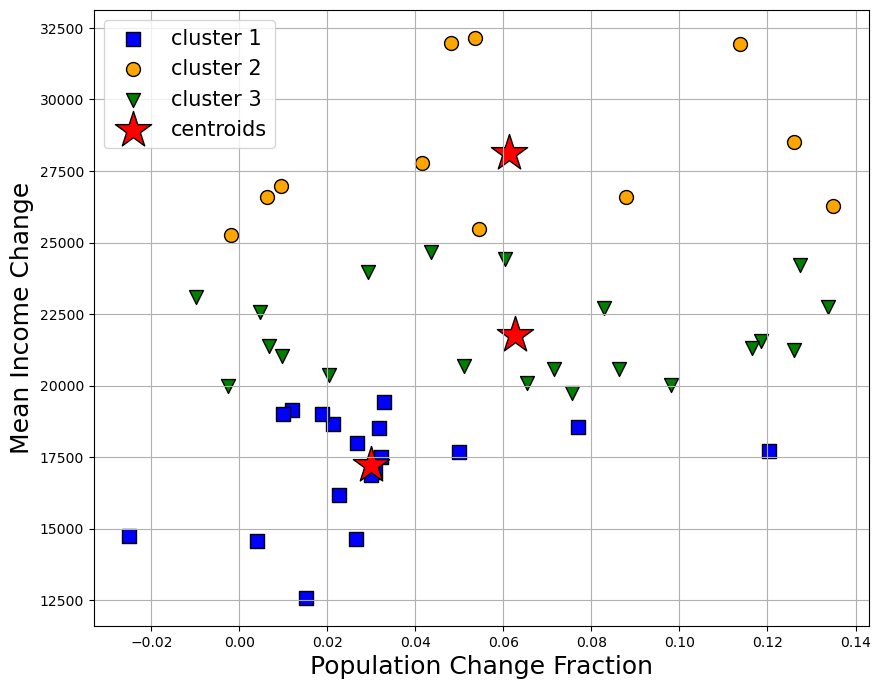

In [330]:
plt.figure(figsize=(10,8))

idx0 = 0
idx1 = 1

label0 = features[idx0]
label1 = features[idx1]


# Plot the 3 clusters, making use of masking to display the first
# two features (the 0th and 1st column), plotted versus each other
plt.scatter(
    X[labels_km == 0, idx0], X[labels_km == 0, idx1],
    s=100, c='blue',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[labels_km == 1, idx0], X[labels_km == 1, idx1],
    s=100, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[labels_km == 2, idx0], X[labels_km == 2, idx1],
    s=100, c='green',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# Plot the centroids
plt.scatter(
    model.cluster_centers_[:, idx0], model.cluster_centers_[:, idx1],
    s=750, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.xlabel(label0,fontsize=18)
plt.ylabel(label1, fontsize=18)
plt.legend(scatterpoints=1, fontsize=15, loc='upper left')
plt.grid()

In [331]:
labels_km
states = dfnew['State']

vals = np.unique(labels_km)
print(vals)

for v in vals:
    print(f"{v} ------\n")
    print(states[labels_km==v].values)

#print(states)

[0 1 2]
0 ------

['AL' 'MS' 'OH' 'ME' 'MO' 'AR' 'LA' 'KY' 'WV' 'IN' 'OK' 'IA' 'NM' 'KS'
 'SD' 'NV' 'WY' 'AK']
1 ------

['MA' 'NY' 'CT' 'NJ' 'OR' 'MN' 'CA' 'WA' 'CO' 'HI' 'UT']
2 ------

['RI' 'MD' 'DE' 'SC' 'TN' 'NC' 'PA' 'GA' 'FL' 'IL' 'MI' 'VA' 'NH' 'VT'
 'NE' 'TX' 'WI' 'AZ' 'ID' 'MT' 'ND']


In [332]:
dfnewMap = dfnew.copy(deep=True)
dfnewMap['KM Labels'] = labels_km
#dfnewMap

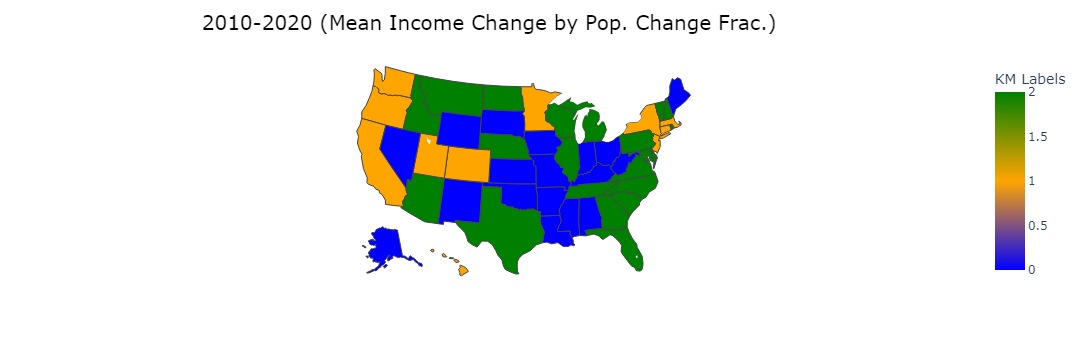

In [333]:
fig = px.choropleth(dfnewMap,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='KM Labels',
                    color_continuous_scale=["blue", "orange", "green"])
fig.update_layout(
      title_text = '2010-2020 (Mean Income Change by Pop. Change Frac.)',
      title_font_size = 20,
      title_font_color="black", 
      title_x=0.45)
fig.show()

### Other Clustering

col_0,0,1
State,,
AK,1,0
AL,0,1
AR,0,1
AZ,0,1
CA,1,0
CO,1,0
CT,1,0
DE,1,0
FL,0,1


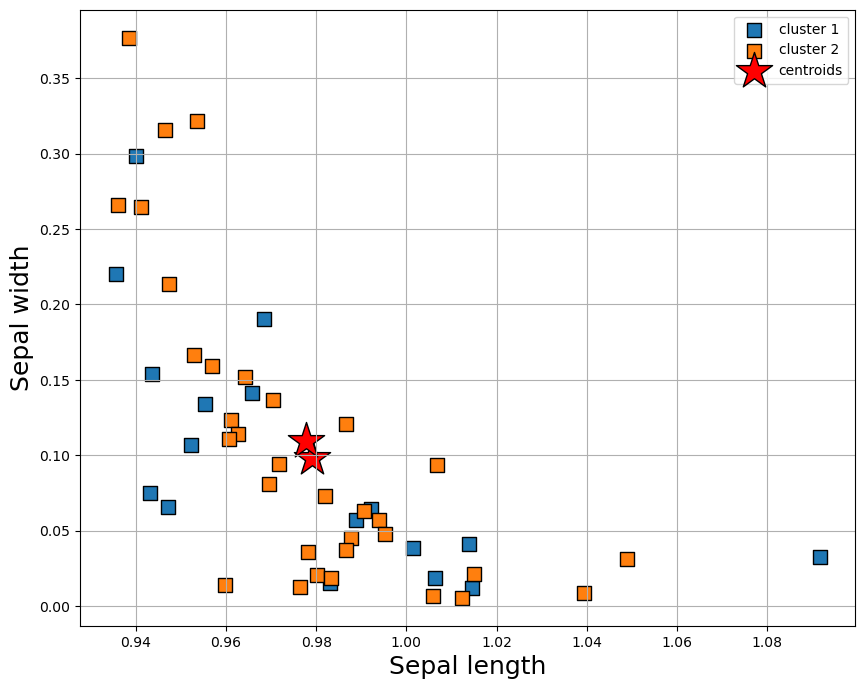

In [75]:
# Create the model with some number of clusters
# Try 2 clusters
model2 = KMeans(n_clusters=2, init='random', n_init=10, random_state=0)

# Run the clustering algorithm! 
labels_km2 = model2.fit_predict(X)

plt.figure(figsize=(10,8))

# Plot the clusters, making use of masking to display the first
# two features (the 0th and 1st column), plotted versus each other

for i in range(0,2):

  plt.scatter(
      X[labels_km2 == i, 0], X[labels_km2 == i, 1],
      s=100,
      marker='s', edgecolor='black',
      label=f'cluster {i+1}'
  )


# Plot the centroids
plt.scatter(
    model2.cluster_centers_[:, 0], model2.cluster_centers_[:, 1],
    s=750, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.xlabel('Sepal length',fontsize=18)
plt.ylabel('Sepal width', fontsize=18)
plt.legend(scatterpoints=1)
plt.grid()


pd.crosstab(dfnew['State'], labels_km2)

col_0,0,1,2,3,4,5
State,,,,,,
AK,0,0,0,0,0,1
AL,0,0,1,0,0,0
AR,0,0,1,0,0,0
AZ,0,0,0,1,0,0
CA,1,0,0,0,0,0
CO,0,0,0,0,0,1
CT,1,0,0,0,0,0
DE,0,0,0,0,1,0
FL,0,1,0,0,0,0


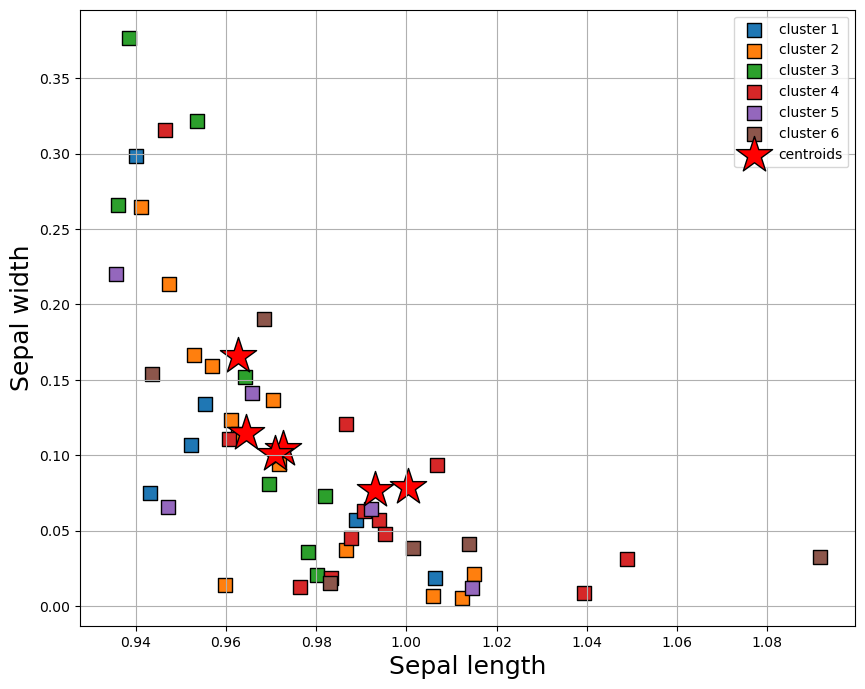

In [76]:
# Create the model with some number of clusters
# Try 6 clusters
model3 = KMeans(n_clusters=6, init='random', n_init=10, random_state=0)

# Run the clustering algorithm! 
labels_km3 = model3.fit_predict(X)

plt.figure(figsize=(10,8))

# Plot the clusters, making use of masking to display the first
# two features (the 0th and 1st column), plotted versus each other

for i in range(0,6):
  plt.scatter(
      X[labels_km3 == i, 0], X[labels_km3 == i, 1],
      s=100,
      marker='s', edgecolor='black',
      label=f'cluster {i+1}'
  )

# Plot the centroids
plt.scatter(
    model3.cluster_centers_[:, 0], model3.cluster_centers_[:, 1],
    s=750, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.xlabel('Sepal length',fontsize=18)
plt.ylabel('Sepal width', fontsize=18)
plt.legend(scatterpoints=1)
plt.grid()


pd.crosstab(dfnew['State'], labels_km3)

In [77]:
print(model.inertia_)
print(model2.inertia_)
print(model3.inertia_)

2158994772.3786426
3816123772.6004257
541974286.7944813


C:\Users\blake\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'inertia')

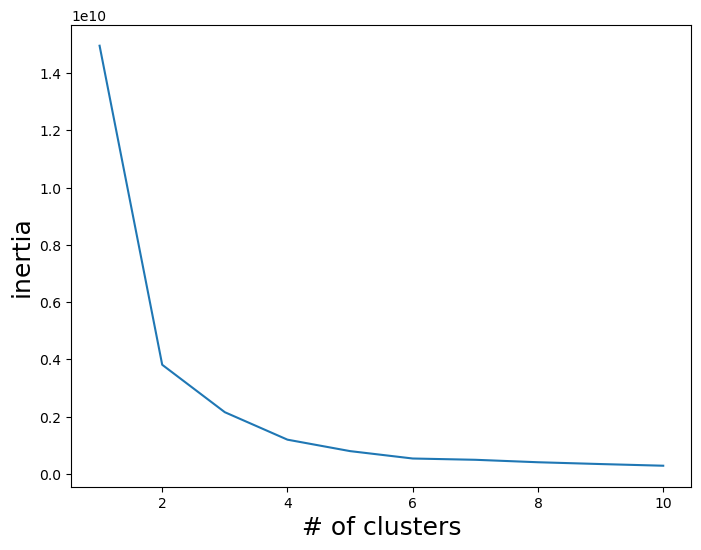

In [78]:
inertias = []
nclusters = []

# Try from 1 to 10 clusters
for i in range(1,11):
  model_temp = KMeans(n_clusters=i, init='random', n_init=10, random_state=0)
  model_temp.fit(X)

  nclusters.append(i)
  inertias.append(model_temp.inertia_)

plt.figure(figsize=(8,6))
plt.plot(nclusters, inertias)
plt.xlabel('# of clusters', fontsize=18)
plt.ylabel('inertia', fontsize=18)

## HERE

do next set of work here